# Dose Response Supplement

Generating all plots used in the supplement.

We begin by importing required packages.

In [1]:
import numpy as np
import pandas as pd
##import seaborn as sns # Delete??
import matplotlib.pyplot as plt
import scipy.optimize as opt
import statistics
from scipy import stats
import os
import re
from datetime import date

#from statannotations.Annotator import Annotator # adds p-values to plots
#import ptitprince as pt ## needed?

import libraries.utilities as util

## Evaluating the absolute IC50

We first look at the mean IC50 obtained for all the compounds using a PLAID layout versus a completly random layout. 

In [12]:
## Loading data for a high error=0.125 and 6 doses
# 1 replicate
#absolute_ic50_data = np.loadtxt('absolute_ic50_data-48-6-1-20210630.csv', delimiter=',', dtype='str') ## OLD
absolute_ic50_data = np.loadtxt('absolute_ic50_data-36-8-dil8-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
#absolute_ic50_data = np.loadtxt('absolute_ic50_data-48-6-dil18-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

# 2 replicate
#absolute_ic50_data = np.loadtxt('absolute_ic50_data-20210621.csv', delimiter=',', dtype='str')

# 3 replicates
#absolute_ic50_data = np.loadtxt('absolute_ic50_data-16-6-3complete-20210716.csv', delimiter=',', dtype='str')

## Loading data for a low error=0.025
# 1 replicate
#absolute_ic50_data = np.loadtxt('absolute_ic50_data-16-6-3-0.025-20210921.csv', delimiter=',', dtype='str')


## Loading data for a high error=0.125 and 4 doses
#absolute_ic50_data = np.loadtxt('absolute_ic50_data-72-4-1-0.125-202112030000.csv', delimiter=',', dtype='str')


14400.0 

             diff_d           MSE        d         fit_d
count  14400.000000  14400.000000  14400.0  14400.000000
mean       1.929897      0.096241    100.0     98.950272
std        1.474367      0.077166      0.0      2.190095
min        0.000259      0.000022    100.0     91.870407
25%        0.723553      0.036058    100.0     97.472244
50%        1.608892      0.079018    100.0     98.947778
75%        2.866497      0.136351    100.0    100.326636
max       14.632998      0.498400    100.0    114.632998
             diff_d           MSE        d         fit_d
count  14400.000000  1.440000e+04  14400.0  14400.000000
mean       2.451462  1.210427e-01    100.0    100.528562
std        1.871685  1.011740e-01      0.0      3.038732
min        0.000123  5.873823e-07    100.0     90.088546
25%        0.951730  4.303021e-02    100.0     98.481044
50%        2.038399  9.630005e-02    100.0    100.453546
75%        3.565524  1.749912e-01    100.0    102.624750
max        9.911454  

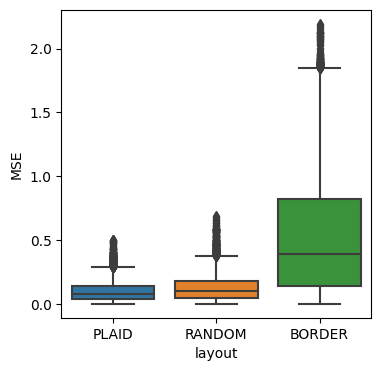

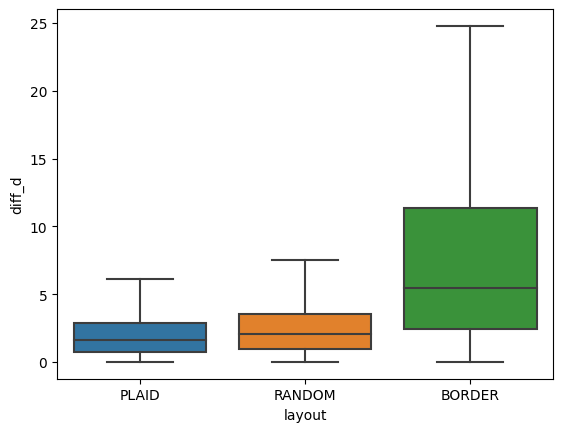

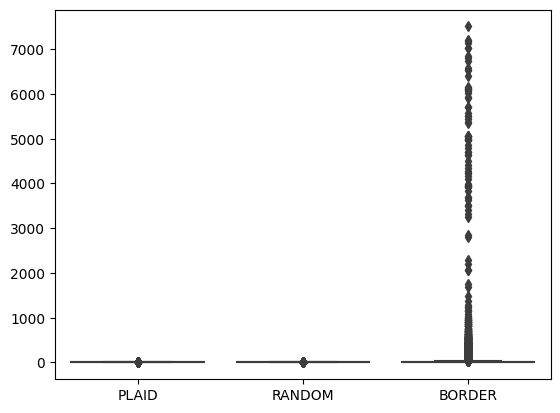

In [59]:
results_df = pd.DataFrame(absolute_ic50_data, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score", "b", "c", "d", "e", "fit_b", "fit_c", "fit_d", "fit_e"])
results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')
#results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')

results_df = results_df.sort_values("MSE")
results_df = results_df[np.logical_not(np.isnan(results_df['MSE']))]


results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "RANDOM"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "RANDOM"), 'layout'] = "BORDER"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "RANDOM") & (results_df['layout'] != "BORDER"), 'layout'] = "PLAID"

results_df.d = pd.to_numeric(results_df.d, errors='coerce')
results_df.fit_d = pd.to_numeric(results_df.fit_d, errors='coerce')

results_df.insert(0, 'diff_d', 0)
results_df.diff_d = abs(results_df.d - results_df.fit_d)

    
plaid_description = results_df[results_df['layout']=='PLAID'].describe()

print(plaid_description.loc['count','MSE'],"\n")

print(plaid_description)

print(results_df[results_df['layout']=='RANDOM'].describe())

print(results_df[results_df['layout']=='BORDER'].describe())


fig, ax = plt.subplots(figsize=(4, 4))

#ax.set(ylim=(0,0.6))


ax = sns.boxplot(x="layout", y="MSE", data=results_df[results_df['MSE']!=np.inf], order=["PLAID", "RANDOM", "BORDER"])
plt.show()
ax = sns.boxplot(x="layout", y="diff_d", data=results_df[results_df['MSE']!=np.inf], order=["PLAID", "RANDOM", "BORDER"],showfliers = False)
plt.show()
ax = sns.boxplot(x="layout", y="diff_d", data=results_df[results_df['MSE']!=np.inf], order=["PLAID", "RANDOM", "BORDER"])

#ax = sns.barplot(x="layout", y="MSE", data=results_df[results_df['MSE']!=np.inf], order=["PLAID", "RANDOM"])

ax.set(xlabel='', ylabel='')

plt.show()

create_latex_table(absolute_ic50_data, 'test.tex')


In [4]:
#fig.savefig("dose-response-absic50-48-6-1-sq-essense.png",bbox_inches='tight')

                MSE              E  rows lost
count  4.233150e+05  423315.000000   423315.0
mean   6.929589e-02      44.733435        0.0
std    1.631404e-01      25.627468        0.0
min    7.145781e-08       1.000000        0.0
25%    2.330558e-03      23.000000        0.0
50%    5.821609e-03      45.000000        0.0
75%    3.330739e-02      67.000000        0.0
max    1.096755e+01      89.000000        0.0
                MSE              E  rows lost
count  4.196180e+05  419618.000000   419618.0
mean   1.564486e-01      44.546316        0.0
std    1.539341e+00      25.603018        0.0
min    1.898021e-07       1.000000        0.0
25%    8.784818e-03      22.000000        0.0
50%    4.114267e-02      44.000000        0.0
75%    1.781333e-01      67.000000        0.0
max    3.215154e+02      89.000000        0.0


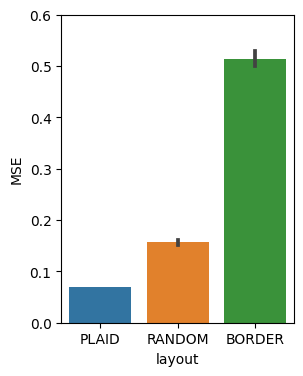

In [5]:
## Plot Absolute IC50
results_df = pd.DataFrame(absolute_ic50_data, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost"])
results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')

results_df["rows lost"] = pd.to_numeric(results_df["rows lost"], errors='coerce')
results_df["E"] = pd.to_numeric(results_df["E"], errors='coerce')

results_df = results_df.sort_values("MSE")

results_df = results_df[np.logical_not(np.isnan(results_df['MSE']))]

results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "RANDOM"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "RANDOM"), 'layout'] = "BORDER"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "RANDOM") & (results_df['layout'] != "BORDER"), 'layout'] = "PLAID"

temp_none = results_df[(results_df['MSE']!=np.inf) & (results_df['rows lost']<2) ]


#temp_half = results_df[(results_df['MSE']!=np.inf) & (results_df['rows lost']<=1) & (results_df['E']>70) & (results_df['E']<80) ]
temp_half = results_df[(results_df['rows lost']<=1) & (results_df['MSE']!=np.inf) ]
#ax = sns.barplot(x="layout", y="MSE", data=temp_half, order=["PLAID", "RANDOM"])
#plt.show()

print(temp_half[temp_half['layout']=='PLAID'].describe())

print(temp_half[temp_half['layout']=='RANDOM'].describe())

#print(temp_half[temp_half['layout']=='BORDER'].describe())


fig, ax = plt.subplots(figsize=(3, 4))

ax.set(ylim=(0,0.6))

ax = sns.barplot(x="layout", y="MSE", data=temp_half, order=["PLAID", "RANDOM","BORDER"])
plt.show()

#fig.savefig("dose-response-absic50-16-6-3.png",bbox_inches='tight')

In [6]:
#fig.savefig("dose-response-absic50-plaid-rand-36-4-2_0.125_0.25.png")

rand_results_array = results_df.MSE[results_df.layout=="RANDOM"]
plaid_results_array = results_df.MSE[results_df.layout=="PLAID"]
border_results_array = results_df.MSE[results_df.layout=="BORDER"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array))

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array))
print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))

print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))

print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False))

print("One way ANOVA:",stats.f_oneway(rand_results_array,plaid_results_array,border_results_array))

Variance of PLAID layouts: nan
Variance of RANDOM layouts: nan
Variance of BORDER layouts: nan
PLAID vs RANDOM layouts: Ttest_indResult(statistic=nan, pvalue=nan)
PLAID vs RANDOM layouts: Ttest_indResult(statistic=nan, pvalue=nan)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=nan, pvalue=nan)
PLAID vs BORDER layouts: Ttest_indResult(statistic=nan, pvalue=nan)
One way ANOVA: F_onewayResult(statistic=nan, pvalue=nan)


/home/jovyan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:5681: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:3661: RuntimeWarning: invalid value encountered in subtract
  alldata -= offset
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:3669: RuntimeWarning: invalid value encountered in subtract
  ssbn += _square_of_sums(a - offset, axis=axis) / a.shape[axis]


In [7]:
rand_results_array = temp_none.MSE[temp_none.layout=="RANDOM"]
plaid_results_array = temp_none.MSE[temp_none.layout=="PLAID"]
border_results_array = temp_none.MSE[temp_none.layout=="BORDER"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array))

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array))
print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))

print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))

print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False))

print("One way ANOVA:",stats.f_oneway(rand_results_array,plaid_results_array,border_results_array))

Variance of PLAID layouts: 0.026614798381561614
Variance of RANDOM layouts: 2.3695695194550424
Variance of BORDER layouts: 19.903913970402872
PLAID vs RANDOM layouts: Ttest_indResult(statistic=-36.62953180125482, pvalue=1.65348943741126e-293)
PLAID vs RANDOM layouts: Ttest_indResult(statistic=-36.472783184444836, pvalue=8.397635275613915e-291)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=46.356071298080124, pvalue=0.0)
PLAID vs BORDER layouts: Ttest_indResult(statistic=-60.57576779692132, pvalue=0.0)
One way ANOVA: F_onewayResult(statistic=3114.3060202185547, pvalue=0.0)


In [8]:
rand_results_array = temp_half.MSE[temp_half.layout=="RANDOM"]
plaid_results_array = temp_half.MSE[temp_half.layout=="PLAID"]
border_results_array = temp_half.MSE[temp_half.layout=="BORDER"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array))

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array))
print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))

print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))

print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False))

Variance of PLAID layouts: 0.026614798381561614
Variance of RANDOM layouts: 2.3695695194550424
Variance of BORDER layouts: 19.903913970402872
PLAID vs RANDOM layouts: Ttest_indResult(statistic=-36.62953180125482, pvalue=1.65348943741126e-293)
PLAID vs RANDOM layouts: Ttest_indResult(statistic=-36.472783184444836, pvalue=8.397635275613915e-291)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=46.356071298080124, pvalue=0.0)
PLAID vs BORDER layouts: Ttest_indResult(statistic=-60.57576779692132, pvalue=0.0)


### Plotting results for multiple replicates together

This is how we generate the plots for the paper.

In [9]:
# 8 doses, small error, new loess
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil4-1-0.01-20220219-no-reg-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil4-2-0.01-20220219-no-reg-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil4-3-0.01-20220219-no-reg-new-reg.csv', delimiter=',', dtype='str')

In [10]:
# 8 doses, large error, new loess
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil4-1-1.0-20220219-mean-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil4-2-1.0-20220219-mean-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil4-3-1.0-20220219-mean-new-reg.csv', delimiter=',', dtype='str')

In [11]:
# 8 doses, large error, new loess done-12-8-dil4-3-1.0-20220220-more-noise-new-reg 
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil4-1-1.0-20220221-more-noise-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil4-2-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil4-3-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')

In [12]:
# 8 doses, large error, new loess  more-noise-max_nfev 
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil4-1-1.0-20220223-relaxed-bounds-max_nfev-new-reg.csv', delimiter=',', dtype='str')
#absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil4-2-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')
#absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-12-8-dil4-3-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil4-2-1.0-20220223-relaxed-bounds-max_nfev-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil4-3-1.0-20220223-relaxed-bounds-max_nfev-new-reg.csv', delimiter=',', dtype='str')

In [13]:
# 8 doses, large error, new loess  more-noise-max_nfev 
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil4-1-0.45-20220224-whatever-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil4-2-0.45-20220224-whatever-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil4-3-0.45-20220224-whatever-new-reg.csv', delimiter=',', dtype='str')

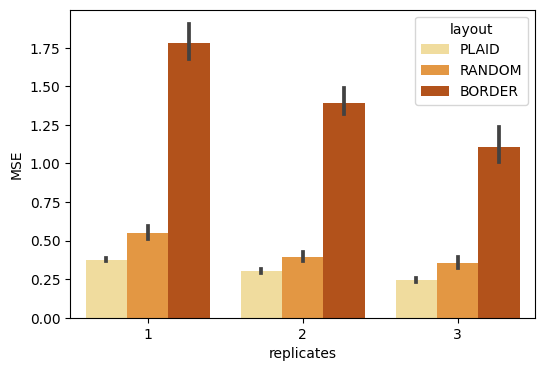

In [14]:
results_df = pd.DataFrame(absolute_ic50_data_1rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost"])

results_df_2rep = pd.DataFrame(absolute_ic50_data_2rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost"])

results_df_3rep = pd.DataFrame(absolute_ic50_data_3rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost"])

results_df.insert(0, 'replicates', 1)
results_df_2rep.insert(0, 'replicates', 2)
results_df_3rep.insert(0, 'replicates', 3)

results_df = results_df.append(results_df_2rep)
results_df = results_df.append(results_df_3rep)

results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')
results_df.E = pd.to_numeric(results_df.E, errors='coerce')

results_df = results_df[np.logical_not(np.isnan(results_df['MSE']))]

#results_df = results_df[(results_df["error type"]!="bowl") & (results_df["error type"]!="left")]

results_df = results_df[(results_df["error type"]=="bowl-nl")]
#results_df = results_df[(results_df["E"]<90)]
#results_df = results_df[(results_df["E"]>10)]

results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "RANDOM"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "RANDOM"), 'layout'] = "BORDER"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "RANDOM") & (results_df['layout'] != "BORDER"), 'layout'] = "PLAID"

fig, ax = plt.subplots(figsize=(6, 4))
#ax.set(ylim=(0,4.5))
ax = sns.barplot(x='replicates', y="MSE", data=results_df[results_df['MSE']!=np.inf], hue="layout", palette='YlOrBr')
plt.show()


In [15]:
# 8 doses, large error, new loess  more-noise-max_nfev 
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil4-1-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil4-2-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil4-3-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [16]:
# 8 doses, large error, new loess  more-noise-max_nfev 
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil4-1-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil4-2-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil4-3-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [17]:
# 8 doses, large error, new loess  more-noise-max_nfev 
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil8-1-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil8-2-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil8-3-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [18]:
# 6 doses, large error, new loess  more-noise-max_nfev 
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-48-6-dil8-1-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-24-6-dil8-2-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-16-6-dil8-3-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [19]:
# 6 doses, large error, new loess  more-noise-max_nfev 
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-48-6-dil8-1-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-24-6-dil8-2-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-16-6-dil8-3-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

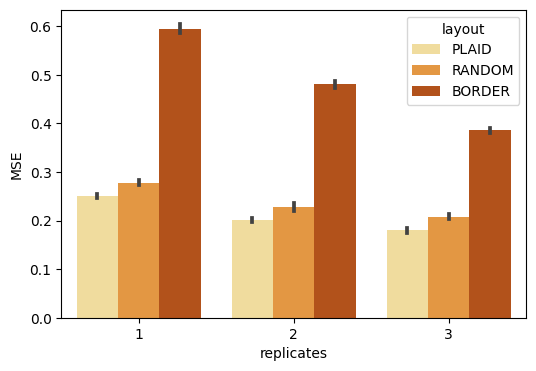

In [20]:
results_df = pd.DataFrame(absolute_ic50_data_1rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score"])

results_df_2rep = pd.DataFrame(absolute_ic50_data_2rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score"])

results_df_3rep = pd.DataFrame(absolute_ic50_data_3rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score"])

results_df.insert(0, 'replicates', 1)
results_df_2rep.insert(0, 'replicates', 2)
results_df_3rep.insert(0, 'replicates', 3)

results_df = results_df.append(results_df_2rep)
results_df = results_df.append(results_df_3rep)

results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')
results_df.E = pd.to_numeric(results_df.E, errors='coerce')
results_df.r2_score = pd.to_numeric(results_df.r2_score, errors='coerce')

results_df = results_df[np.logical_not(np.isnan(results_df['MSE']))]

#results_df = results_df[(results_df["error type"]!="bowl") & (results_df["error type"]!="left")]

results_df = results_df[(results_df["error type"]=="bowl-nl")]
#results_df = results_df[(results_df["E"]<90)]
#results_df = results_df[(results_df["E"]>10)]

#results_df = results_df[(results_df.r2_score>=0.8)]

results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "RANDOM"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "RANDOM"), 'layout'] = "BORDER"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "RANDOM") & (results_df['layout'] != "BORDER"), 'layout'] = "PLAID"

fig, ax = plt.subplots(figsize=(6, 4))
#ax.set(ylim=(0,4.5))
ax = sns.barplot(x='replicates', y="MSE", data=results_df[results_df['MSE']!=np.inf], hue="layout", palette='YlOrBr')

plt.show()


## New stuff from here?

In [2]:
tables_dir = "latex_tables/"

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:4.563e-52 t=-1.523e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:5.899e-44 t=-1.396e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.254e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-6.753e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:4.562e-80 t=-1.900e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.539e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-7.964e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-6.247e+01
1_Effective vs. 1_Border: t-test independent samples,

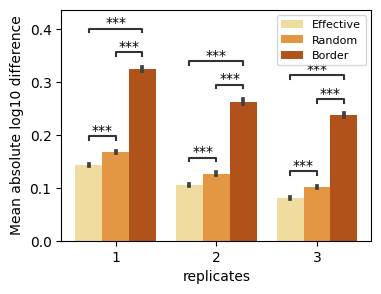

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:4.563e-52 t=-1.523e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:5.899e-44 t=-1.396e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.254e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-6.753e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:4.562e-80 t=-1.900e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.539e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-7.964e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-6.247e+01
1_Effective vs. 1_Border: t-test independent samples,

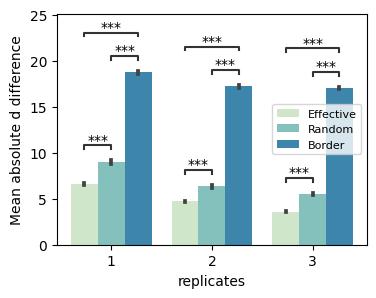

In [5]:
# 6 doses (currently on the supplement. Not using neg controls in the curve)
fig_name = "-6doses-dil18-bowl-0.055"

absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-48-6-dil18-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-24-6-dil18-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-16-6-dil18-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name="-1-2-3"+fig_name, fig_type='absic50')
util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name="-1-2-3"+fig_name, fig_type='d_diff')

## Description tables:
util.create_latex_table(absolute_ic50_data_1rep, tables_dir+"absic50-table-1rep"+fig_name+".tex", column_name="MSE")
util.create_latex_table(absolute_ic50_data_2rep, tables_dir+"absic50-table-2rep"+fig_name+".tex", column_name="MSE")
util.create_latex_table(absolute_ic50_data_3rep, tables_dir+"absic50-table-3rep"+fig_name+".tex", column_name="MSE")

util.create_latex_table(absolute_ic50_data_1rep, tables_dir+"diff_d-table-1rep"+fig_name+".tex", column_name="diff_d")
util.create_latex_table(absolute_ic50_data_2rep, tables_dir+"diff_d-table-2rep"+fig_name+".tex", column_name="diff_d")
util.create_latex_table(absolute_ic50_data_3rep, tables_dir+"diff_d-table-3rep"+fig_name+".tex", column_name="diff_d")


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:3.397e-55 t=-1.570e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:6.010e-56 t=-1.584e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.015e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-6.786e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:8.598e-100 t=-2.127e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.403e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-8.073e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.729e+01
1_Effective vs. 1_Border: t-test independent samples

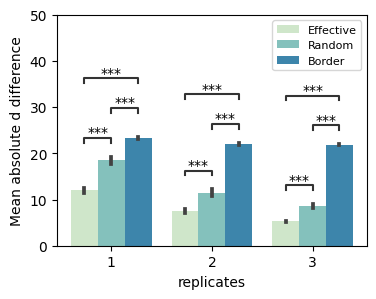

In [6]:
# 6 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-6doses-dil18-bowl-0.085"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-48-6-dil18-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-24-6-dil18-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-16-6-dil18-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name="-1-2-3"+fig_name, plot_mse = False, y_max=50)

util.create_latex_table(absolute_ic50_data_1rep, tables_dir+"absic50-table-1rep"+fig_name+".tex", column_name="MSE")
util.create_latex_table(absolute_ic50_data_2rep, tables_dir+"absic50-table-2rep"+fig_name+".tex", column_name="MSE")
util.create_latex_table(absolute_ic50_data_3rep, tables_dir+"absic50-table-3rep"+fig_name+".tex", column_name="MSE")

util.create_latex_table(absolute_ic50_data_1rep, tables_dir+"diff_d-table-1rep"+fig_name+".tex", column_name="diff_d")
util.create_latex_table(absolute_ic50_data_2rep, tables_dir+"diff_d-table-2rep"+fig_name+".tex", column_name="diff_d")
util.create_latex_table(absolute_ic50_data_3rep, tables_dir+"diff_d-table-3rep"+fig_name+".tex", column_name="diff_d")


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:6.587e-57 t=-1.595e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:2.134e-54 t=-1.560e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-7.059e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-8.245e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:3.521e-89 t=-2.008e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-1.016e+02
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-9.327e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-7.742e+01
1_Effective vs. 1_Border: t-test independent samples,

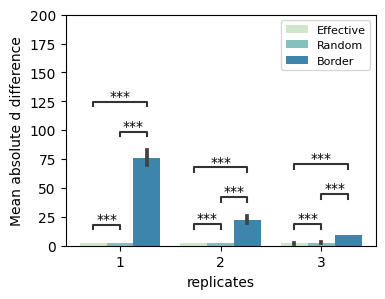

In [7]:
# 6 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-6doses-dil18-bowl-neg-controls-0.055"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-48-6-dil18-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-24-6-dil18-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-16-6-dil18-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name="-1-2-3"+fig_name, plot_mse = False, y_max = 200)

util.create_latex_table(absolute_ic50_data_1rep, tables_dir+"absic50-table-1rep"+fig_name+".tex", column_name="MSE")
util.create_latex_table(absolute_ic50_data_2rep, tables_dir+"absic50-table-2rep"+fig_name+".tex", column_name="MSE")
util.create_latex_table(absolute_ic50_data_3rep, tables_dir+"absic50-table-3rep"+fig_name+".tex", column_name="MSE")

util.create_latex_table(absolute_ic50_data_1rep, tables_dir+"diff_d-table-1rep"+fig_name+".tex", column_name="diff_d")
util.create_latex_table(absolute_ic50_data_2rep, tables_dir+"diff_d-table-2rep"+fig_name+".tex", column_name="diff_d")
util.create_latex_table(absolute_ic50_data_3rep, tables_dir+"diff_d-table-3rep"+fig_name+".tex", column_name="diff_d")



p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:4.257e-60 t=-1.641e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:4.017e-68 t=-1.755e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-8.021e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-8.713e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.822e-112 t=-2.262e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-1.131e+02
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-9.698e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-8.584e+01
1_Effective vs. 1_Border: t-test independent samples

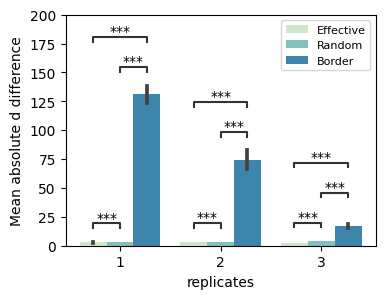

In [24]:
# 6 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-1-2-3-6doses-dil18-bowl-neg-controls-0.085"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-48-6-dil18-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-24-6-dil18-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-16-6-dil18-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, plot_mse = False, y_max=200)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:2.564e-79 t=-1.897e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:4.991e-72 t=-1.810e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-6.634e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-7.188e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:7.869e-106 t=-2.194e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-8.060e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-8.445e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-7.495e+01
1_Effective vs. 1_Border: t-test independent samples

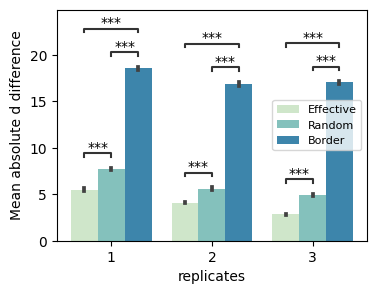

In [25]:
# 8 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-1-2-3-8doses-dil8-bowl-0.055"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil8-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil8-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil8-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, plot_mse = False)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:2.966e-89 t=-2.017e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:6.547e-83 t=-1.948e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-6.318e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-6.827e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.548e-122 t=-2.366e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.927e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-8.139e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-7.127e+01
1_Effective vs. 1_Border: t-test independent samples

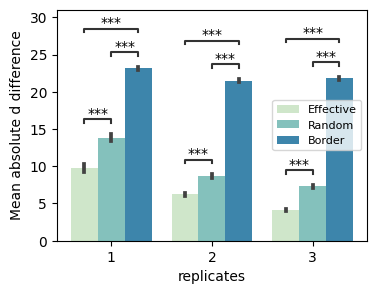

In [26]:
# 8 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-1-2-3-8doses-dil8-bowl-0.085"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil8-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil8-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil8-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, plot_mse = False)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:3.145e-97 t=-2.109e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:4.796e-77 t=-1.875e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-7.457e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-8.079e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:7.184e-120 t=-2.339e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-1.024e+02
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-9.122e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-8.091e+01
1_Effective vs. 1_Border: t-test independent samples

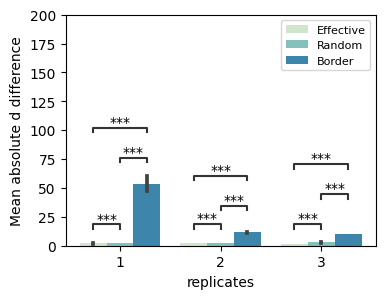

In [27]:
# 8 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-1-2-3-8doses-dil8-bowl-neg-controls-0.055"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil8-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil8-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil8-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, plot_mse = False, y_max=200)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:4.680e-106 t=-2.206e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:1.678e-90 t=-2.039e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-7.848e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-7.857e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:2.070e-123 t=-2.374e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-1.078e+02
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-8.803e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-8.397e+01
1_Effective vs. 1_Border: t-test independent sample

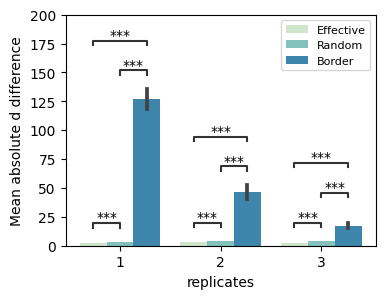

In [28]:
# 8 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-1-2-3-8doses-dil8-bowl-neg-controls-0.085"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil8-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil8-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil8-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, plot_mse = False, y_max=200)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:1.621e-77 t=-1.881e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:6.279e-127 t=-2.452e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.349e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-6.281e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:7.106e-102 t=-2.156e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-7.243e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-7.644e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-6.021e+01
1_Effective vs. 1_Border: t-test independent sample

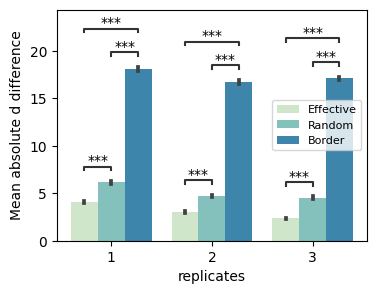

In [29]:
# 12 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-1-2-3-12doses-dil4-bowl-0.055"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-24-12-dil4-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-12-12-dil4-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-8-12-dil4-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, plot_mse = False)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:1.523e-80 t=-1.919e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:1.641e-125 t=-2.437e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.268e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-5.988e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:4.991e-90 t=-2.023e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.810e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-7.195e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.877e+01
1_Effective vs. 1_Border: t-test independent samples

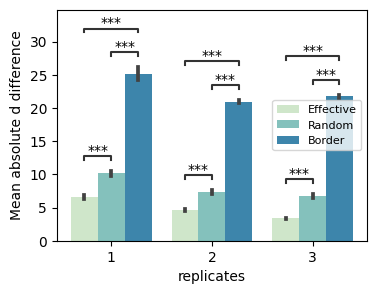

In [30]:
# 12 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-1-2-3-12doses-dil4-bowl-0.085"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-24-12-dil4-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-12-12-dil4-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-8-12-dil4-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, plot_mse = False)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:4.902e-86 t=-1.986e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:2.550e-129 t=-2.476e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-6.163e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-6.751e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.434e-126 t=-2.411e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-8.585e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-7.906e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-6.715e+01
1_Effective vs. 1_Border: t-test independent sample

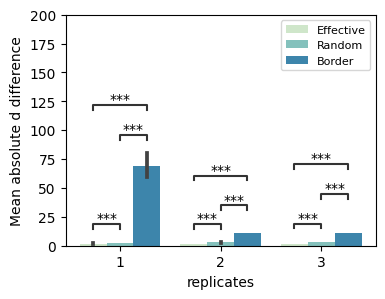

In [31]:
# 12 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-1-2-3-12doses-dil4-bowl-neg-controls-0.055"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-24-12-dil4-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-12-12-dil4-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-8-12-dil4-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, plot_mse = False, y_max=200)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:8.470e-172 t=-2.823e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:1.037e-252 t=-3.473e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-8.168e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-8.710e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:2.486e-222 t=-3.204e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-1.166e+02
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-1.010e+02
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-8.821e+01
1_Effective vs. 1_Border: t-test independent sampl

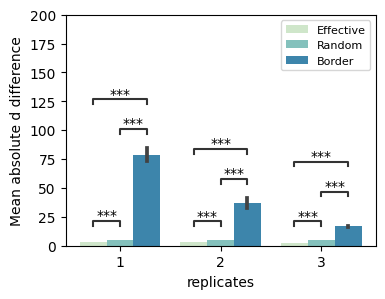

In [32]:
# 12 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-1-2-3-12doses-dil4-bowl-neg-controls-0.085"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-24-12-dil4-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-12-12-dil4-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-8-12-dil4-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, plot_mse = False, y_max=200)

### Diagonal!

### Half columns

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:3.970e-57 t=-1.600e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:8.137e-72 t=-1.807e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.636e+01
3_Random vs. 3_Border: t-test independent samples, P_val:7.129e-146 t=-2.617e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:5.964e-58 t=-1.608e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.806e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:4.962e-214 t=-3.204e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.017e+01
1_Effective vs. 1_Border: t-test independent sample

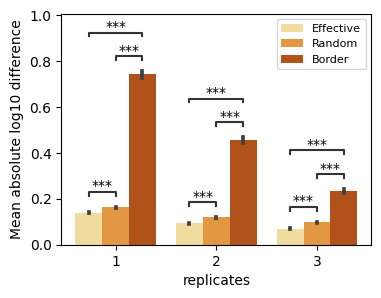

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:3.970e-57 t=-1.600e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:8.137e-72 t=-1.807e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.636e+01
3_Random vs. 3_Border: t-test independent samples, P_val:7.129e-146 t=-2.617e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:5.964e-58 t=-1.608e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.806e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:4.962e-214 t=-3.204e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.017e+01
1_Effective vs. 1_Border: t-test independent sample

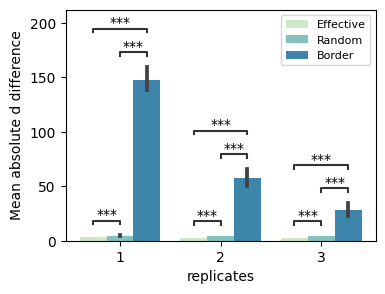

In [40]:
# 8 doses (currently on the paper)
fig_name = "-1-2-3-8doses-dil8-half-columns-neg-controls-0.4"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil8-1-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil8-2-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil8-3-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='absic50')#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)
util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='d_diff')#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)


## Half column (supplement)

### Weaker plate effect

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:7.433e-38 t=-1.289e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:3.842e-56 t=-1.586e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.382e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-4.286e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.117e-47 t=-1.453e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-7.415e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-5.017e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.759e+01
1_Effective vs. 1_Border: t-test independent samples,

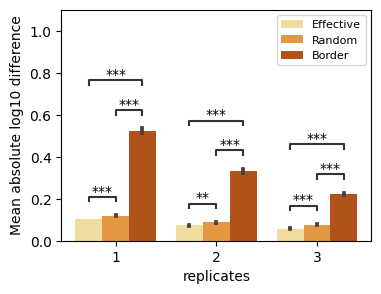

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:7.433e-38 t=-1.289e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:3.842e-56 t=-1.586e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.382e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-4.286e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.117e-47 t=-1.453e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-7.415e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-5.017e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.759e+01
1_Effective vs. 1_Border: t-test independent samples,

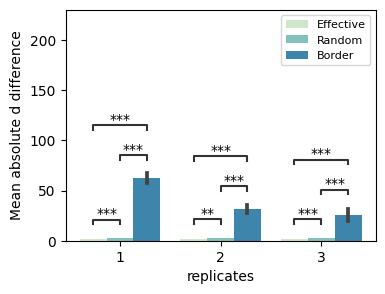

In [57]:
# 6 doses (currently part of the supplement)
fig_name = "-1-2-3-6doses-dil18-half-columns-neg-controls-0.2"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-48-6-dil18-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-24-6-dil18-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-16-6-dil18-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='absic50',y_max=1.1)
util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='d_diff',y_max=230)#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:6.272e-57 t=-1.597e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:8.309e-78 t=-1.884e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.139e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-4.239e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.096e-51 t=-1.516e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.758e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-4.898e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.502e+01
1_Effective vs. 1_Border: t-test independent samples,

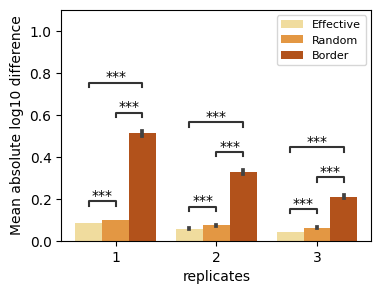

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:6.272e-57 t=-1.597e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:8.309e-78 t=-1.884e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.139e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-4.239e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.096e-51 t=-1.516e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.758e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-4.898e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.502e+01
1_Effective vs. 1_Border: t-test independent samples,

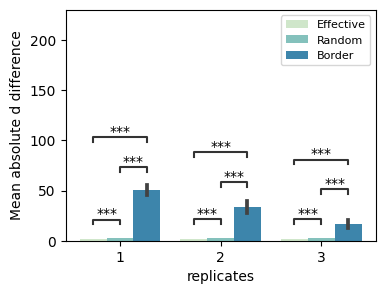

In [58]:
# 8 doses (currently part of the supplement)
fig_name = "-1-2-3-8doses-dil8-half-columns-neg-controls-0.2"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil8-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil8-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil8-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='absic50',y_max=1.1)#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)
util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='d_diff',y_max=230)#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:1.942e-98 t=-2.130e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:1.616e-63 t=-1.701e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.418e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-4.094e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.874e-120 t=-2.350e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.620e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-4.699e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.832e+01
1_Effective vs. 1_Border: t-test independent samples

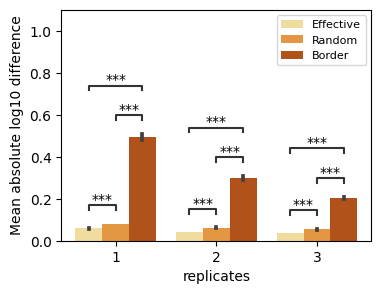

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:1.942e-98 t=-2.130e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:1.616e-63 t=-1.701e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.418e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-4.094e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.874e-120 t=-2.350e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.620e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-4.699e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.832e+01
1_Effective vs. 1_Border: t-test independent samples

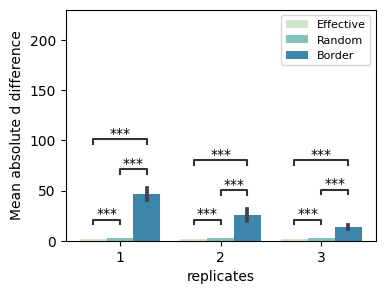

In [60]:
# 12 doses (currently part of the supplement)
fig_name = "-1-2-3-12doses-dil4-half-columns-neg-controls-0.2"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-24-12-dil4-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-12-12-dil4-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-8-12-dil4-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='absic50',y_max=1.1)
util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='d_diff',y_max=230)


### Stronger plate effect

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:5.049e-32 t=-1.180e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:3.808e-62 t=-1.673e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.760e+01
3_Random vs. 3_Border: t-test independent samples, P_val:1.211e-138 t=-2.538e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:5.240e-58 t=-1.608e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-7.401e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:8.341e-223 t=-3.251e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.109e+01
1_Effective vs. 1_Border: t-test independent sample

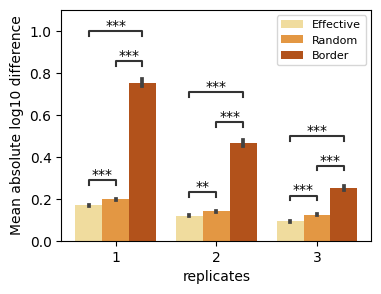

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:5.049e-32 t=-1.180e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:3.808e-62 t=-1.673e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.760e+01
3_Random vs. 3_Border: t-test independent samples, P_val:1.211e-138 t=-2.538e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:5.240e-58 t=-1.608e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-7.401e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:8.341e-223 t=-3.251e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.109e+01
1_Effective vs. 1_Border: t-test independent sample

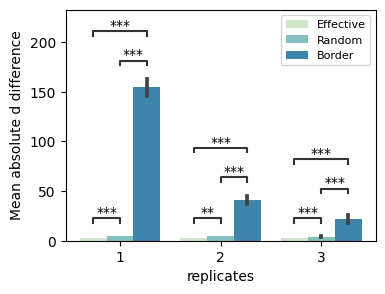

In [3]:
# 6 doses (currently part of the supplement)
fig_name = "-6doses-dil18-half-columns-neg-controls-0.4"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-48-6-dil18-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-24-6-dil18-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-16-6-dil18-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name="-1-2-3"+fig_name, fig_type='absic50', y_max = 1.1)
util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name="-1-2-3"+fig_name, fig_type='d_diff', y_max = 230)#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)

## Individual latex tables
util.create_latex_table(absolute_ic50_data_1rep, tables_dir+"absic50-table-1rep"+fig_name+".tex", column_name="MSE")
util.create_latex_table(absolute_ic50_data_2rep, tables_dir+"absic50-table-2rep"+fig_name+".tex", column_name="MSE")
util.create_latex_table(absolute_ic50_data_3rep, tables_dir+"absic50-table-3rep"+fig_name+".tex", column_name="MSE")

util.create_latex_table(absolute_ic50_data_1rep, tables_dir+"diff_d-table-1rep"+fig_name+".tex", column_name="diff_d")
util.create_latex_table(absolute_ic50_data_2rep, tables_dir+"diff_d-table-2rep"+fig_name+".tex", column_name="diff_d")
util.create_latex_table(absolute_ic50_data_3rep, tables_dir+"diff_d-table-3rep"+fig_name+".tex", column_name="diff_d")

## 3 replicates
util.create_latex_table_wide(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, tables_dir+"absic50-table"+fig_name+".tex", table_text = "Absolute \\ECIC{}", column_name="MSE")

util.create_latex_table_pvalues_wide(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, tables_dir+"pvalues-absic50-table"+fig_name+".tex", table_text = "Absolute \\ECIC{}", column_name="MSE")


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:6.578e-58 t=-1.611e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:3.466e-72 t=-1.812e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.630e+01
3_Random vs. 3_Border: t-test independent samples, P_val:1.720e-146 t=-2.623e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:2.131e-58 t=-1.615e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.805e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:7.136e-215 t=-3.210e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.013e+01
1_Effective vs. 1_Border: t-test independent sample

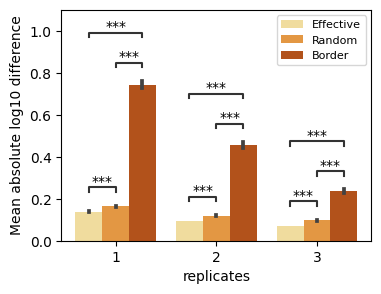

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:6.578e-58 t=-1.611e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:3.466e-72 t=-1.812e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.630e+01
3_Random vs. 3_Border: t-test independent samples, P_val:1.720e-146 t=-2.623e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:2.131e-58 t=-1.615e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-6.805e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:7.136e-215 t=-3.210e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.013e+01
1_Effective vs. 1_Border: t-test independent sample

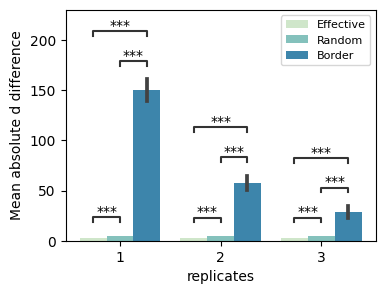

In [4]:
# 8 doses (currently part of the paper)
fig_name = "-8doses-dil8-half-columns-neg-controls-0.4"
#absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil8-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-36-8-dil8-1-0.4-20220504-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil8-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-12-8-dil8-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name="-1-2-3"+fig_name, fig_type='absic50', y_max=1.1)#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)
util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name="-1-2-3"+fig_name, fig_type='d_diff', y_max=230)#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)

## Individual LaTeX tables
util.create_latex_table(absolute_ic50_data_1rep, tables_dir+"absic50-table-1rep"+fig_name+".tex", column_name="MSE")
util.create_latex_table(absolute_ic50_data_2rep, tables_dir+"absic50-table-2rep"+fig_name+".tex", column_name="MSE")
util.create_latex_table(absolute_ic50_data_3rep, tables_dir+"absic50-table-3rep"+fig_name+".tex", column_name="MSE")

util.create_latex_table(absolute_ic50_data_1rep, tables_dir+"diff_d-table-1rep"+fig_name+".tex", column_name="diff_d")
util.create_latex_table(absolute_ic50_data_2rep, tables_dir+"diff_d-table-2rep"+fig_name+".tex", column_name="diff_d")
util.create_latex_table(absolute_ic50_data_3rep, tables_dir+"diff_d-table-3rep"+fig_name+".tex", column_name="diff_d")


## 3 replicates
util.create_latex_table_wide(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, tables_dir+"absic50-table"+fig_name+".tex", table_text = "Absolute \\ECIC{}", column_name="MSE")

util.create_latex_table_pvalues_wide(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, tables_dir+"pvalues-absic50-table"+fig_name+".tex", table_text = "Absolute \\ECIC{}", column_name="MSE")


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:7.582e-93 t=-2.066e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:9.351e-67 t=-1.746e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-3.947e+01
3_Random vs. 3_Border: t-test independent samples, P_val:1.052e-138 t=-2.570e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.444e-134 t=-2.489e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.659e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:5.307e-203 t=-3.153e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.376e+01
1_Effective vs. 1_Border: t-test independent sampl

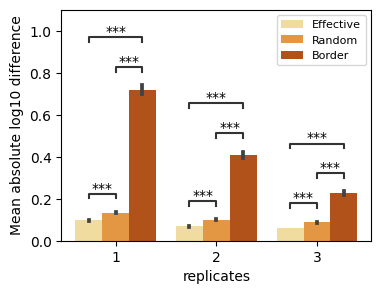

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:7.582e-93 t=-2.066e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:9.351e-67 t=-1.746e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-3.947e+01
3_Random vs. 3_Border: t-test independent samples, P_val:1.052e-138 t=-2.570e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.444e-134 t=-2.489e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.659e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:5.307e-203 t=-3.153e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.376e+01
1_Effective vs. 1_Border: t-test independent sampl

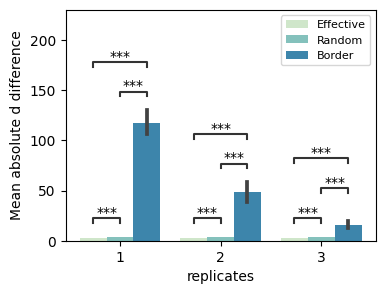

In [55]:
# 12 doses (part of the supplement)
fig_name = "-1-2-3-12doses-dil4-half-columns-neg-controls-0.4"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-24-12-dil4-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-12-12-dil4-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-8-12-dil4-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='absic50',y_max=1.1)#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)
util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='d_diff',y_max=230)#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:1.105e-93 t=-2.076e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:8.511e-68 t=-1.761e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-3.958e+01
3_Random vs. 3_Border: t-test independent samples, P_val:2.333e-137 t=-2.557e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:7.799e-134 t=-2.482e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.661e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:1.275e-201 t=-3.142e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.388e+01
1_Effective vs. 1_Border: t-test independent sampl

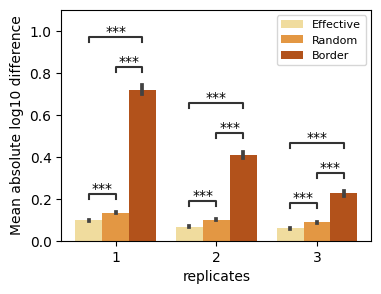

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:1.105e-93 t=-2.076e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:8.511e-68 t=-1.761e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-3.958e+01
3_Random vs. 3_Border: t-test independent samples, P_val:2.333e-137 t=-2.557e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:7.799e-134 t=-2.482e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.661e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:1.275e-201 t=-3.142e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-4.388e+01
1_Effective vs. 1_Border: t-test independent sampl

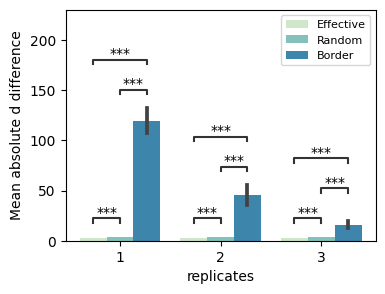

In [56]:
# 12 doses (another simulation, similar results)
fig_name = "-1-2-3-12doses-dil4-half-columns-neg-controls-0.4-b"
absolute_ic50_data_1rep = np.loadtxt('absolute_ic50_data-24-12-dil4-1-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt('absolute_ic50_data-12-12-dil4-2-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt('absolute_ic50_data-8-12-dil4-3-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='absic50',y_max=1.1)#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)
util.plot_barplot_replicate_data(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name=fig_name, fig_type='d_diff',y_max=230)#, plot_mse = True, y_max=None, leg_ncol=None, leg_loc=None)


In [ ]:
results_df = pd.DataFrame(absolute_ic50_data_3rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score", "b", "c", "d", "e", "fit_b", "fit_c", "fit_d", "fit_e"])

#results_df_3rep = pd.DataFrame(absolute_ic50_data_3rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost"])
## Rename the layouts so they can be grouped as PLAID, RANDOM or Border
results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "Random"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "Random"), 'layout'] = "Border"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "Random"), 'layout'] = "Effective"


results_df_b = pd.DataFrame(absolute_ic50_data_2rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score", "b", "c", "d", "e", "fit_b", "fit_c", "fit_d", "fit_e"])

#results_df_3rep = pd.DataFrame(absolute_ic50_data_3rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost"])
## Rename the layouts so they can be grouped as PLAID, RANDOM or Border
results_df_b.loc[(results_df_b['layout'] >= "plate_layout_rand"), 'layout'] = "Random"
results_df_b.loc[(results_df_b['layout'] >= "plate_layout_border") & (results_df_b['layout'] != "Random"), 'layout'] = "Border"
results_df_b.loc[(results_df_b['layout'] >= "plate_layout") & (results_df_b['layout'] != "Random"), 'layout'] = "Effective"



In [ ]:
results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')

results_df = results_df[np.logical_not(np.isnan(results_df['MSE']))]
results_df = results_df[np.logical_not(np.isinf(results_df['MSE']))]

results_df.d = pd.to_numeric(results_df.d, errors='coerce')
results_df.fit_d = pd.to_numeric(results_df.fit_d, errors='coerce')

results_df.insert(0, 'diff_d', 0)
results_df.diff_d = abs(results_df.d - results_df.fit_d)


print(results_df[results_df['layout']=='Effective'].describe())

print(results_df[results_df['layout']=='Random'].describe())

print(results_df[results_df['layout']=='Border'].describe())


results_df_b.MSE = pd.to_numeric(results_df_b.MSE, errors='coerce')

results_df_b = results_df_b[np.logical_not(np.isnan(results_df_b['MSE']))]
results_df_b = results_df_b[np.logical_not(np.isinf(results_df_b['MSE']))]

print(results_df_b[results_df_b['layout']=='Effective'].describe())

print(results_df_b[results_df_b['layout']=='Random'].describe())

print(results_df_b[results_df_b['layout']=='Border'].describe())

In [ ]:
#fig.savefig("dose-response-absic50-plaid-rand-36-4-2_0.125_0.25.png")

rand_results_array = results_df.MSE[results_df.layout=="Random"]
plaid_results_array = results_df.MSE[results_df.layout=="Effective"]
border_results_array = results_df.MSE[results_df.layout=="Border"]

rand_results_array_b = results_df_b.MSE[results_df_b.layout=="Random"]
plaid_results_array_b = results_df_b.MSE[results_df_b.layout=="Effective"]
border_results_array_b = results_df_b.MSE[results_df_b.layout=="Border"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array))

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array))
print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))

print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))

print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False))

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array_b,equal_var = False))



In [ ]:
#fig.savefig("dose-response-absic50-plaid-rand-36-4-2_0.125_0.25.png")

rand_results_array = results_df.diff_d[results_df.layout=="Random"]
plaid_results_array = results_df.diff_d[results_df.layout=="Effective"]
border_results_array = results_df.diff_d[results_df.layout=="Border"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array))

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array))
print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))

print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))

print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False))





## Evaluating the relative EC50/IC50

Now we evaluate the relative IC50's obtained. We plot the mean of the IC50 for all compounds obtained using either a PLAID layout or a random layout.

In [ ]:
## Data with lost rows
#relative_ic50_data = np.loadtxt('relative_ic50_data-20210624.csv', delimiter=',', dtype='str')

# 1 replicate
relative_ic50_data = np.loadtxt('relative_ic50_data-48-6-1-20210630.csv', delimiter=',', dtype='str')

# 2 replicates
#relative_ic50_data = np.loadtxt('relative_ic50_data-20210621.csv', delimiter=',', dtype='str')

# 3 replicates
#relative_ic50_data = np.loadtxt('relative_ic50_data-16-6-3complete-20210716.csv', delimiter=',', dtype='str')

In [ ]:
results_df = pd.DataFrame(relative_ic50_data, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost"])
results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')
results_df = results_df.sort_values("MSE")

results_df["rows lost"] = pd.to_numeric(results_df["rows lost"], errors='coerce')
results_df["E"] = pd.to_numeric(results_df["E"], errors='coerce')

results_df = results_df.sort_values("MSE")

#results_df = results_df[(results_df['MSE']!=np.inf) & (results_df['rows lost']>1)]

## Rename the layouts so they can be grouped as PLAID, RANDOM or Border
results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "RANDOM"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "RANDOM"), 'layout'] = "BORDER"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "RANDOM"), 'layout'] = "PLAID"

results_df = results_df[(results_df['rows lost']<=1) ]

print(results_df[results_df['layout']=='PLAID'].describe())

print(results_df[results_df['layout']=='RANDOM'].describe())

print(results_df[results_df['layout']=='BORDER'].describe())

fig, ax = plt.subplots(figsize=(4, 4)) #6,15

ax.set(ylim=(0,0.42))

ax = sns.barplot(x="layout", y="MSE", data=results_df, order=["PLAID", "RANDOM", "BORDER"])

ax.set(xlabel='', ylabel='')
plt.show()

In [ ]:
fig.savefig("dose-response-relic50-24-6-2-sq.png",bbox_inches='tight')

In [ ]:

fig, ax = plt.subplots(figsize=(15, 8))

ax = sns.barplot(x="rows lost", y="MSE", hue="layout", data=results_df)

fig.savefig("dose-response-relic50-24-6-2_lost-rows.125_0.01.png")

In [ ]:
#fig.savefig("dose-response-relic50-plaid-rand-36-4-2_0.125_0.25.png")

rand_results_array = results_df.MSE[results_df.layout=="RANDOM"]
plaid_results_array = results_df.MSE[results_df.layout=="PLAID"]
border_results_array = results_df.MSE[results_df.layout=="BORDER"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array),"\n")

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = True))
print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))
print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))
print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False),"\n")

print("One way ANOVA:",stats.f_oneway(rand_results_array,plaid_results_array,border_results_array))

In [ ]:
temp_half = results_df[(results_df['MSE']!=np.inf) & (results_df['rows lost']<=1) & (results_df['E']>20) & (results_df['E']<100) ]
#temp_half.loc[(temp_half['layout']=='PLAID') & (temp_half["MSE"]>0.688),"MSE"] = 0.1

fig, ax = plt.subplots(figsize=(15, 10))

#ax = sns.barplot(x="layout", y="MSE", data=temp_half, order=["PLAID", "RANDOM"])

#sns.barplot(x = "group", y = "score", data = df, capsize= .1)
pal = sns.color_palette(n_colors=1)

#ax=pt.half_violinplot( x = "MSE", y = "layout", data = temp_half, palette = pal, bw = .2, cut = 0.,
 #                     scale = "area", width = .6, inner = None, orient = ort, order=["PLAID", "RANDOM"])

dx = "MSE"; dy = "layout"; ort = "h"; pal = "Set2"; sigma = 0.01
#f, ax = plt.subplots(figsize=(7, 5))

pt.RainCloud(x = "layout", y = "MSE", data = temp_half, palette = pal, bw = sigma,
                 width_viol = 1.3, ax = ax, orient = ort, order=["PLAID", "RANDOM", "BORDER"], jitter = 0.15)

#ax = sns.violinplot(x="MSE", y="layout", data=temp_half, order=["PLAID", "RANDOM"])
#ax = sns.stripplot(x="MSE", y="layout", data=temp_half,morder=["PLAID", "RANDOM"], jitter=0.3)



In [ ]:
rand_results_array = temp_half.MSE[temp_half.layout=="RANDOM"]
plaid_results_array = temp_half.MSE[temp_half.layout=="PLAID"]
border_results_array = temp_half.MSE[temp_half.layout=="BORDER"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array))

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array))
print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))

print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))

print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False))

### Plotting results for multiple replicates together

This is how we generate the plots for the paper.

In [ ]:
## Data with lost rows
#relative_ic50_data = np.loadtxt('relative_ic50_data-20210624.csv', delimiter=',', dtype='str')

# 6 doses
#relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-1-20210630.csv', delimiter=',', dtype='str')
#relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-20210621.csv', delimiter=',', dtype='str')
#relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-3complete-20210716.csv', delimiter=',', dtype='str')

# 4 doses
#relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-72-4-1-8-20211217.csv', delimiter=',', dtype='str')
#relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-72-4-1-8-20211214.csv', delimiter=',', dtype='str') # NO PLAID!
#relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-4-2-8-20211212.csv', delimiter=',', dtype='str')
#relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-36-4-2-8-20211212.csv', delimiter=',', dtype='str')
#relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-24-4-3-8-20211216.csv', delimiter=',', dtype='str')

## New tests
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-72-4-dil8-1-8-20211218.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-36-4-dil8-2-8-20211218.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-24-4-dil8-3-8-20211218.csv', delimiter=',', dtype='str')


# 8 doses
#relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-6-1-8-20211216.csv', delimiter=',', dtype='str')
#relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-6-2-8-20211216.csv', delimiter=',', dtype='str')
#relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-6-3-8-20211216.csv', delimiter=',', dtype='str')

#relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-8-20211218.csv', delimiter=',', dtype='str')
#relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-8-20211218.csv', delimiter=',', dtype='str')
#relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-8-20211218.csv', delimiter=',', dtype='str')



In [ ]:
#4 doses, no errors, lowess

relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-72-4-dil15-1-0.0-20220218-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-36-4-dil15-2-0.0-20220218-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-24-4-dil15-3-0.0-20220218-new-reg.csv', delimiter=',', dtype='str')


In [ ]:
# 4 doses, more noise
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-72-4-dil15-1-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-36-4-dil15-2-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-24-4-dil15-3-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 6 doses, small error, new loess
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil8-1-0.001-20220218-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil8-2-0.001-20220218-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil8-3-0.001-20220218-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 6 doses, small error, new loess 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil8-1-0.075-20220218-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil8-2-0.075-20220218-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil8-3-0.075-20220218-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 6 doses, small error, new loess -0.45-20220224-whatever-new-reg
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil8-1-0.45-20220224-whatever-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil8-2-0.45-20220224-whatever-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil8-3-0.45-20220224-whatever-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 6 doses, small error, new loess -0.3-20220224-tight-bounds-max_nfev-new-reg
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil8-1-0.3-20220224-tight-bounds-max_nfev-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil8-2-0.3-20220224-tight-bounds-max_nfev-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil8-3-0.3-20220224-tight-bounds-max_nfev-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, small error, new loess
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil4-1-0.001-20220218-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil4-2-0.001-20220218-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-0.001-20220218-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, small error, new loess
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil4-1-0.01-20220219-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil4-2-0.01-20220219-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-0.01-20220219-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, small error, new loess, no mean
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil4-1-0.01-20220219no-mean-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil4-2-0.01-20220219no-mean-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-0.01-20220219no-mean-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, small error, new loess, no mean 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil4-1-1.0-20220219-mean-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil4-2-1.0-20220219-mean-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-1.0-20220219-mean-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, large error, new loess done-12-8-dil4-3-1.0-20220220-more-noise-new-reg
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil4-1-1.0-20220221-more-noise-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil4-2-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, large error, new loess  more-noise-max_nfev relaxed-bounds-max_nfev 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil4-1-1.0-20220223-relaxed-bounds-max_nfev-new-reg.csv', delimiter=',', dtype='str')
#relative_ic50_data_2rep = np.loadtxt('absolute_ic50_data-18-8-dil4-2-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')
#relative_ic50_data_2rep = np.loadtxt('absolute_ic50_data-12-8-dil4-3-1.0-20220220-more-noise-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil4-2-1.0-20220223-relaxed-bounds-max_nfev-new-reg.csv', delimiter=',', dtype='str')
#relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-1.0-20220222-more-noise-max_nfev-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-1.0-20220223-relaxed-bounds-max_nfev-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, large error, new loess  more-noise-max_nfev relaxed-bounds-max_nfev -0.45-20220224-whatever-new-reg GOOD
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil4-1-0.45-20220224-whatever-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil4-2-0.45-20220224-whatever-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-0.45-20220224-whatever-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, large error, new loess  more-noise-max_nfev relaxed-bounds-max_nfev -0.45-20220224-whatever-new-reg 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil4-1-0.055-20220225-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil4-2-0.055-20220225-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-0.055-20220225-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
results_df = pd.DataFrame(relative_ic50_data_1rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost"])
results_df_2rep = pd.DataFrame(relative_ic50_data_2rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost"])
results_df_3rep = pd.DataFrame(relative_ic50_data_3rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost"])


#print(results_df_2rep)

results_df.insert(0, 'replicates', 1)
results_df_2rep.insert(0, 'replicates', 2)
results_df_3rep.insert(0, 'replicates', 3)

results_df = results_df.append(results_df_2rep)
results_df = results_df.append(results_df_3rep)

results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')
results_df.E = pd.to_numeric(results_df.E, errors='coerce')

results_df = results_df[np.logical_not(np.isnan(results_df['MSE']))]

#results_df = results_df[(results_df["error type"]!="bowl") & (results_df["error type"]!="left") & (results_df["error type"]!="top") ]
results_df = results_df[(results_df["error type"]=="bowl-nl")]

x = 51
#results_df = results_df[(results_df["E"]<x)]
#results_df = results_df[(results_df["E"]>10)]

results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "RANDOM"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "RANDOM"), 'layout'] = "BORDER"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "RANDOM") & (results_df['layout'] != "BORDER"), 'layout'] = "PLAID"

fig, ax = plt.subplots(figsize=(6, 4))
#ax.set(ylim=(0,1))
ax = sns.barplot(x='replicates', y="MSE", data=results_df[results_df['MSE']!=np.inf], hue="layout", palette='viridis')
plt.show()

print(results_df)

In [ ]:
# 8 doses, large error, new loess  more-noise-max_nfev relaxed-bounds-max_nfev -0.45-20220224-whatever-new-reg 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil4-1-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil4-2-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, large error, new loess  more-noise-max_nfev relaxed-bounds-max_nfev -0.45-20220224-whatever-new-reg 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil4-1-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil4-2-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil4-3-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, large error, new loess 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, large error, new loess 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil16-1-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil16-2-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil16-3-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses, large error, new loess 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil14-1-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil14-2-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil14-3-0.055-20220301-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 6 doses, large error, new loess  more-noise-max_nfev relaxed-bounds-max_nfev -0.45-20220224-whatever-new-reg 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil8-1-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil8-2-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil8-3-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 12 doses, large error, new loess  more-noise-max_nfev relaxed-bounds-max_nfev -0.45-20220224-whatever-new-reg 
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil3-1-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil3-2-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
#relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-12-dil3-3-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
results_df = pd.DataFrame(relative_ic50_data_1rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score"])
results_df_2rep = pd.DataFrame(relative_ic50_data_2rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score"])
results_df_3rep = pd.DataFrame(relative_ic50_data_3rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score"])


#print(results_df_2rep)

results_df.insert(0, 'replicates', 1)
results_df_2rep.insert(0, 'replicates', 2)
results_df_3rep.insert(0, 'replicates', 3)

results_df = results_df.append(results_df_2rep)
results_df = results_df.append(results_df_3rep)

results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')
results_df.E = pd.to_numeric(results_df.E, errors='coerce')
results_df.r2_score = pd.to_numeric(results_df.r2_score, errors='coerce')

results_df = results_df[np.logical_not(np.isnan(results_df['MSE']))]

#results_df = results_df[(results_df["error type"]!="bowl") & (results_df["error type"]!="left") & (results_df["error type"]!="top") ]
results_df = results_df[(results_df["error type"]=="bowl-nl")]

#x = 51
#results_df = results_df[(results_df["E"]<x)]
#results_df = results_df[(results_df["E"]>10)]


results_df = results_df[(results_df.r2_score>=0.8)]


results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "RANDOM"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "RANDOM"), 'layout'] = "BORDER"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "RANDOM") & (results_df['layout'] != "BORDER"), 'layout'] = "PLAID"

fig, ax = plt.subplots(figsize=(6, 4))
#ax.set(ylim=(0,1))
ax = sns.barplot(x='replicates', y="MSE", data=results_df[results_df['MSE']!=np.inf], hue="layout", palette='viridis')
plt.show()

ax = sns.boxplot(x='replicates', y="r2_score", data=results_df[results_df['MSE']!=np.inf], hue="layout", palette='viridis')
plt.show()


In [ ]:
fig.savefig("dose-response-relic50-1-2-3-4doses.png",bbox_inches='tight')

In [ ]:
# 6 doses (currently on the appendix. Does not use neg controls, only compound points)
fig_name = "-1-2-3-6doses-dil18-bowl-0.055"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil18-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil18-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil18-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 0.83)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=30)

In [ ]:
# 6 doses (currently on the appendix. Does not use neg controls, only compound points)
fig_name = "-1-2-3-6doses-dil18-bowl-0.085"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil18-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil18-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil18-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 0.83)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=30)

In [ ]:
# 6 doses (currently on the appendix. Using 4 negative controls)
fig_name = "-1-2-3-6doses-dil18-bowl-neg-controls-0.055"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil18-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil18-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil18-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 10.7)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=40)


In [ ]:
# 6 doses (currently on the appendix. Using 4 negative controls)
fig_name = "-1-2-3-6doses-dil18-bowl-neg-controls-0.085"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil18-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil18-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil18-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 10.7)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=40)


In [ ]:
# 8 doses (currently on the appendix. Does not use neg controls, only compound points)
fig_name = "-1-2-3-8doses-dil8-bowl-0.055"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 0.83)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=30)


In [ ]:
# 8 doses (currently on the appendix. Does not use neg controls, only compound points)
fig_name = "-1-2-3-8doses-dil8-bowl-0.085"
pvalue_thresholds = [[1e-43, "***"], [1e-12, "**"], [0.05, "*"], [1, "ns"]]

relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 0.83,pvalue_thresholds=pvalue_thresholds)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=30)


In [ ]:
# 8 doses (currently on the appendix. Using 4 negative controls)
fig_name = "-1-2-3-8doses-dil8-bowl-neg-controls-0.055"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 10.7)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=40)

In [ ]:
# 8 doses (currently on the appendix. Using 4 negative controls)
fig_name = "-1-2-3-8doses-dil8-bowl-neg-controls-0.085"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 10.7)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=40)


In [ ]:
# 12 doses (currently on the appendix. Does not use neg controls, only compound points)
fig_name = "-1-2-3-12doses-dil4-bowl-0.055"
pvalue_thresholds = [[1e-43, "***"], [1e-12, "**"], [0.05, "*"], [1, "ns"]]

relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 0.83, pvalue_thresholds=pvalue_thresholds)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=30)


In [ ]:
# 12 doses (currently on the appendix. Does not use neg controls, only compound points)
fig_name = "-1-2-3-12doses-dil4-bowl-0.085"
pvalue_thresholds = [[1e-43, "***"], [1e-12, "**"], [0.05, "*"], [1, "ns"]]
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 0.83,pvalue_thresholds=pvalue_thresholds)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=30)


In [ ]:
# 12 doses (currently on the appendix. Using 4 negative controls)
fig_name = "-1-2-3-12doses-dil4-bowl-neg-controls-0.055"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 10.7)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=40)


In [ ]:
# 12 doses (currently on the appendix. Using 4 negative controls)
fig_name = "-1-2-3-12doses-dil4-bowl-neg-controls-0.085"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 10.7)

util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=40) #, leg_ncol=None, leg_loc=None)


In [ ]:
# 8 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 6 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil18-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil18-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil18-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 12 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 12 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 12 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.085-20220309-right-half-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.085-20220309-right-half-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.085-20220309-right-half-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 6 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil18-1-0.085-20220309-right-half-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil18-2-0.085-20220309-right-half-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil18-3-0.085-20220309-right-half-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
## Diagonal

In [ ]:
# 12 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.085-20220307-diagonal-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.085-20220307-diagonal-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.085-20220307-diagonal-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 12 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.085-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.085-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.085-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.085-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.085-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.085-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 12 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-8.0-20220313-linear_left-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-8.0-20220313-linear_left-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-8.0-20220313-linear_left-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-1.25-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-1.25-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-1.25-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.1-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.1-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.1-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.1-20220314-exp-right-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.1-20220314-exp-right-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.1-20220314-exp-right-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.06-20220314-np1-exp-right-neg-control-new-reg.csv', delimiter=',', dtype='str')
#relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.06-20220314-np1-exp-right-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.06-20220313-exp-right-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.06-20220314-np1-exp-right-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses (on the paper!)
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')

## Half Columns

### Weaker plate effects


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:3.786e-07 t=-5.081e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:2.741e-19 t=-8.993e+00
2_Random vs. 2_Border: t-test independent samples, P_val:5.811e-172 t=-2.824e+01
3_Random vs. 3_Border: t-test independent samples, P_val:4.984e-35 t=-1.239e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:8.885e-06 t=-4.443e+00
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.323e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:6.236e-37 t=-1.274e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:3.492e-173 t=-2.835e+01
1_Effective vs. 1_Border: t-test independent sample

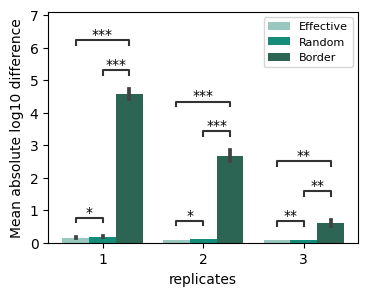

[['Effective', 1, 0.0], ['Random', 1, 0.59375], ['Border', 1, 7.286458333333333], ['Effective', 2, 0.0], ['Random', 2, 0.7916666666666666], ['Border', 2, 18.21875], ['Effective', 3, 0.0], ['Random', 3, 0.1875], ['Border', 3, 17.515625]]


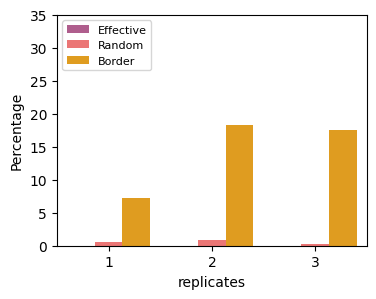

In [79]:
# 6 doses (part of the supplement)
fig_name = "-1-2-3-6doses-dil18-half-columns-neg-controls-0.2"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil18-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil18-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil18-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 7.1)
util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=35)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:4.165e-13 t=-7.257e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:2.845e-36 t=-1.263e+01
2_Random vs. 2_Border: t-test independent samples, P_val:1.095e-128 t=-2.438e+01
3_Random vs. 3_Border: t-test independent samples, P_val:2.243e-25 t=-1.044e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.046e-21 t=-9.580e+00
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-4.559e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:6.650e-27 t=-1.077e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:6.416e-130 t=-2.450e+01
1_Effective vs. 1_Border: t-test independent sample

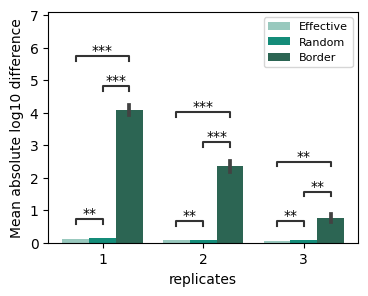

[['Effective', 1, 0.0], ['Random', 1, 0.9513888888888888], ['Border', 1, 6.944444444444445], ['Effective', 2, 0.0], ['Random', 2, 1.2916666666666667], ['Border', 2, 18.75], ['Effective', 3, 0.0], ['Random', 3, 1.125], ['Border', 3, 18.625]]


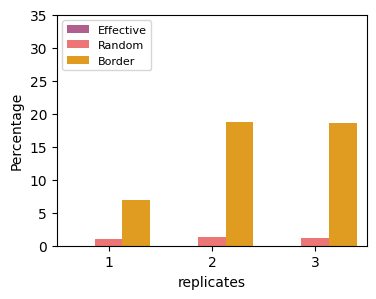

In [80]:
# 8 doses (part of the supplement)
fig_name = "-1-2-3-8doses-dil8-half-columns-neg-controls-0.2"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 7.1)
util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=35)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:5.383e-09 t=-5.840e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:5.245e-06 t=-4.559e+00
2_Random vs. 2_Border: t-test independent samples, P_val:5.522e-85 t=-1.973e+01
3_Random vs. 3_Border: t-test independent samples, P_val:3.290e-19 t=-8.987e+00
1_Effective vs. 1_Random: t-test independent samples, P_val:1.393e-23 t=-1.002e+01
1_Random vs. 1_Border: t-test independent samples, P_val:2.382e-274 t=-3.598e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:1.183e-19 t=-9.100e+00
2_Effective vs. 2_Border: t-test independent samples, P_val:1.330e-85 t=-1.981e+01
1_Effective vs. 1_Border: t-test independent samples

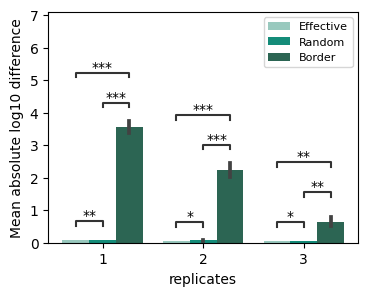

[['Effective', 1, 0.0], ['Random', 1, 1.3020833333333333], ['Border', 1, 7.3125], ['Effective', 2, 0.0], ['Random', 2, 1.375], ['Border', 2, 20.0625], ['Effective', 3, 0.0], ['Random', 3, 1.28125], ['Border', 3, 19.1875]]


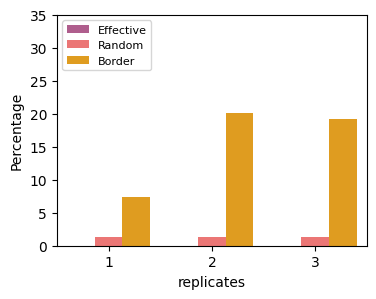

In [81]:
# 12 doses (part of the supplement)
fig_name = "-1-2-3-12doses-dil4-half-columns-neg-controls-0.2"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 7.1)
util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=35)


### Stronger plate effects

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 5.00e-02
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:2.714e-01 t=-1.100e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 5.00e-02
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:7.555e-07 t=-4.949e+00
2_Random vs. 2_Border: t-test independent samples, P_val:4.040e-206 t=-3.101e+01
3_Random vs. 3_Border: t-test independent samples, P_val:2.342e-36 t=-1.263e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.224e-18 t=-8.817e+00
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.036e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:1.164e-43 t=-1.391e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:8.939e-209 t=-3.122e+01
1_Effective vs. 1_Border: t-test independent sample

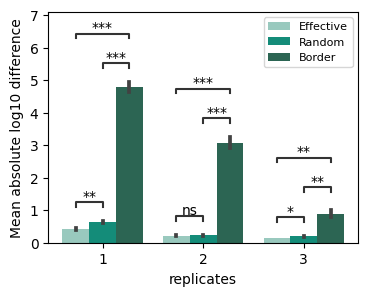

[['Effective', 1, 1.0416666666666667], ['Random', 1, 5.109375], ['Border', 1, 15.40625], ['Effective', 2, 0.23958333333333334], ['Random', 2, 5.552083333333333], ['Border', 2, 30.604166666666668], ['Effective', 3, 0.015625], ['Random', 3, 6.203125], ['Border', 3, 29.734375]]


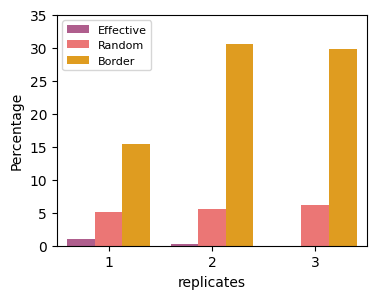

In [88]:
# 6 doses (part of the supplement)
fig_name = "-1-2-3-6doses-dil18-half-columns-neg-controls-0.4"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-48-6-dil18-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-24-6-dil18-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-16-6-dil18-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 7.1)
util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=35) #, leg_ncol=None, leg_loc=None)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:1.181e-10 t=-6.447e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:3.142e-28 t=-1.105e+01
2_Random vs. 2_Border: t-test independent samples, P_val:4.318e-168 t=-2.801e+01
3_Random vs. 3_Border: t-test independent samples, P_val:1.127e-23 t=-1.006e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:4.376e-25 t=-1.036e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-4.543e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:3.094e-26 t=-1.063e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:1.117e-176 t=-2.874e+01
1_Effective vs. 1_Border: t-test independent sample

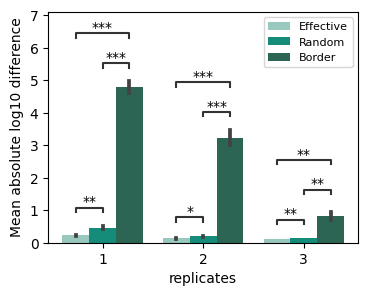

[['Effective', 1, 0.7777777777777778], ['Random', 1, 6.055555555555555], ['Border', 1, 15.805555555555555], ['Effective', 2, 0.1527777777777778], ['Random', 2, 6.736111111111111], ['Border', 2, 32.44444444444444], ['Effective', 3, 0.0], ['Random', 3, 6.166666666666667], ['Border', 3, 29.104166666666668]]


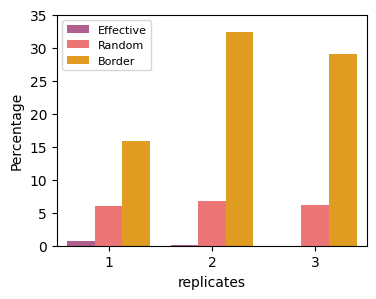

In [5]:
# 8 doses (part of the supplement)
fig_name = "-1-2-3-8doses-dil8-half-columns-neg-controls-0.4"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-36-8-dil8-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-18-8-dil8-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-12-8-dil8-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 7.1)
util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=35) 

## 3 replicates
util.create_latex_table_wide(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, tables_dir+"relic50-table"+fig_name+".tex", table_text = "Relative \\ECIC{}", column_name="MSE")
util.create_latex_table_pvalues_wide(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, tables_dir+"pvalues-relic50-table"+fig_name+".tex", table_text = "Relative \\ECIC{}", column_name="MSE")



p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:1.579e-08 t=-5.658e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:1.057e-06 t=-4.885e+00
2_Random vs. 2_Border: t-test independent samples, P_val:4.363e-94 t=-2.081e+01
3_Random vs. 3_Border: t-test independent samples, P_val:7.162e-19 t=-8.900e+00
1_Effective vs. 1_Random: t-test independent samples, P_val:3.463e-23 t=-9.931e+00
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-3.848e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:1.074e-19 t=-9.111e+00
2_Effective vs. 2_Border: t-test independent samples, P_val:4.430e-95 t=-2.092e+01
1_Effective vs. 1_Border: t-test independent samples,

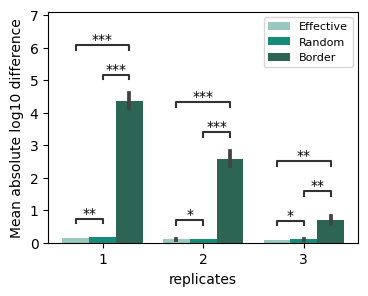

[['Effective', 1, 0.125], ['Random', 1, 6.9375], ['Border', 1, 15.5625], ['Effective', 2, 0.0625], ['Random', 2, 6.9375], ['Border', 2, 32.6875], ['Effective', 3, 0.0], ['Random', 3, 8.3125], ['Border', 3, 32.90625]]


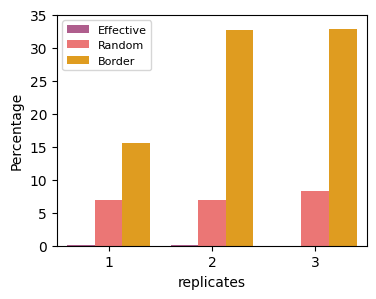

In [3]:
# 12 doses (part of the supplement)
fig_name = "-1-2-3-12doses-dil4-half-columns-neg-controls-0.4"
relative_ic50_data_1rep = np.loadtxt('relative_ic50_data-24-12-dil4-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-12-12-dil4-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt('relative_ic50_data-8-12-dil4-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_replicate_data(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, fig_type='relic50', y_max = 7.1)
util.plot_r2_percentage(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name=fig_name, y_max=35)


In [ ]:
results_df = pd.DataFrame(relative_ic50_data_1rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score", "b", "c", "d", "e", "fit_b", "fit_c", "fit_d", "fit_e"])
results_df_2rep = pd.DataFrame(relative_ic50_data_2rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score", "b", "c", "d", "e", "fit_b", "fit_c", "fit_d", "fit_e"])
results_df_3rep = pd.DataFrame(relative_ic50_data_3rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score", "b", "c", "d", "e", "fit_b", "fit_c", "fit_d", "fit_e"])


#print(results_df_2rep)

results_df.insert(0, 'replicates', 1)
results_df_2rep.insert(0, 'replicates', 2)
results_df_3rep.insert(0, 'replicates', 3)

results_df = results_df.append(results_df_2rep)
results_df = results_df.append(results_df_3rep)

results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')
results_df.E = pd.to_numeric(results_df.E, errors='coerce')
results_df.r2_score = pd.to_numeric(results_df.r2_score, errors='coerce')

results_df = results_df[np.logical_not(np.isnan(results_df['MSE']))]

#results_df = results_df[(results_df["error type"]!="bowl") & (results_df["error type"]!="left") & (results_df["error type"]!="top") ]
#results_df = results_df[(results_df["error type"]=="bowl-nl")]

#x = 51
#results_df = results_df[(results_df["E"]<30)]
#results_df = results_df[(results_df["E"]>70)]


#results_df = results_df[(results_df.r2_score>=0.8)]


results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "Random"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "Random"), 'layout'] = "Border"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "Random") & (results_df['layout'] != "Border"), 'layout'] = "Effective"

palette = ["#91d1c2", "#00A087", "#236e56"] #"#3bccaa", 

fig, ax = plt.subplots(figsize=(4, 3))
ax.set(ylim=(0,6.4))
#ax.set(ylim=(0,0.6))
#ax = sns.barplot(x='replicates', y="MSE", data=results_df[results_df['layout']!='BORDER'], hue="layout", palette='viridis')#,showfliers = False)
ax = sns.barplot(x='replicates', y="MSE", data=results_df, hue="layout", palette=sns.color_palette(palette, 3))#,showfliers = False)

plt.ylabel('Mean absolute log10 difference', fontsize = 10)
plt.legend(ncol=1, loc="upper right", fontsize = 8)

plt.show()

#ax = sns.boxplot(x='replicates', y="r2_score", data=results_df[results_df['MSE']!=np.inf], hue="layout", palette='viridis')
#plt.show()


In [ ]:
fig.savefig("dose-response-relic50-1-2-3-8doses-dil8-half-right-neg-controls-0.4.png",bbox_inches='tight',dpi=1200)

In [ ]:
fig.savefig("dose-response-relic50-1-2-3-8doses-dil8-bowl-neg-controls-close-up-0.085.png",bbox_inches='tight',dpi=1200)

In [ ]:
#relative_ic50_data_2rep = np.loadtxt('relative_ic50_data-36-4-2-8-20211212.csv', delimiter=',', dtype='str')
#results_df = pd.DataFrame(relative_ic50_data_3rep, columns=["layout", "method", "MSE", "error type", "Error", "E", "rows lost"])

# Old format
#results_df = pd.DataFrame(relative_ic50_data_2rep, columns=["layout", "method", "MSE", "error type", "Error", "E", "rows lost","r2_score"])

results_df = pd.DataFrame(relative_ic50_data_3rep, columns=["layout", "compound", "MSE", "error type", "Error", "E", "rows lost", "r2_score", "b", "c", "d", "e", "fit_b", "fit_c", "fit_d", "fit_e"])

results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "RANDOM"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "RANDOM"), 'layout'] = "BORDER"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "RANDOM") & (results_df['layout'] != "BORDER"), 'layout'] = "PLAID"

results_df.MSE = pd.to_numeric(results_df.MSE, errors='coerce')
results_df.r2_score = pd.to_numeric(results_df.r2_score, errors='coerce')

#results_df = results_df[(results_df.r2_score>=0.8)]

#results_df = results_df[np.logical_not(np.isnan(results_df['MSE']))]
#results_df = results_df[(results_df["error type"]=="bowl-nl")]

print(results_df[results_df['layout']=='PLAID'].describe())

print(results_df[results_df['layout']=='RANDOM'].describe())

print(results_df[results_df['layout']=='BORDER'].describe())


plaid_results_array = results_df.MSE[results_df.layout=="PLAID"]
rand_results_array = results_df.MSE[results_df.layout=="RANDOM"]
border_results_array = results_df.MSE[results_df.layout=="BORDER"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array),"\n")

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = True))
print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))
print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))
print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False),"\n")

print("One way ANOVA:",stats.f_oneway(rand_results_array,plaid_results_array,border_results_array))

## Evaluating Residuals

We first look at the residuals against the fitted sigmoid

In [ ]:
# 1 replicate
#residuals = np.loadtxt('residuals-48-6-1-20210630.csv', delimiter=',', dtype='str')

# 2 replicates
#residuals = np.loadtxt('residuals-20210621.csv', delimiter=',', dtype='str')

# 3 replicates
#residuals = np.loadtxt('residuals-16-6-3complete-20210716.csv', delimiter=',', dtype='str')

residuals = np.loadtxt('residuals-12-8-dil4-3-0.45-20220224-whatever-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
residuals_df = pd.DataFrame(residuals, columns=["layout", "error_type", "Error", "E", "rows lost", "residuals", "true_residuals"])
residuals_df.residuals = pd.to_numeric(residuals_df.residuals, errors='coerce')
residuals_df.true_residuals = pd.to_numeric(residuals_df.true_residuals, errors='coerce')
residuals_df['rows lost'] = pd.to_numeric(residuals_df['rows lost'], errors='coerce')

residuals_df = residuals_df[(residuals_df['rows lost']<=1) ]

#residuals_df = residuals_df[np.logical_not(np.isnan(residuals_df["residuals"]))]

#residuals_df = residuals_df.sort_values("residuals")

## Rename the layouts so they can be grouped as PLAID, RANDOM or Border
residuals_df.loc[(residuals_df['layout'] >= "plate_layout_rand"), 'layout'] = "RANDOM"
residuals_df.loc[(residuals_df['layout'] >= "plate_layout_border") & (residuals_df['layout'] != "RANDOM"), 'layout'] = "BORDER"
residuals_df.loc[(residuals_df['layout'] >= "plate_layout") & (residuals_df['layout'] != "RANDOM"), 'layout'] = "PLAID"



#res_data = np.empty((0,2))
#for layout in ['PLAID','RANDOM','BORDER']:
#    layout_res = np.concatenate(np.array(residuals_df[residuals_df['layout']==layout]['residuals']))
#    res = np.vstack([np.full(len(layout_res),layout),layout_res]).T
#    res_data = np.vstack([res_data,res])

#res_df = pd.DataFrame(res_data, columns=["layout", "SE"])
#res_df.SE = pd.to_numeric(res_df.SE, errors='coerce')
#res_df = res_df.sort_values("SE")

residuals_df.residuals = pd.to_numeric(residuals_df.residuals, errors='coerce')
residuals_df = residuals_df.sort_values("true_residuals")

print(residuals_df)

print("PLAID:\n",residuals_df[residuals_df['layout']=='PLAID'].describe(),"\n")

print("RANDOM:\n",residuals_df[residuals_df['layout']=='RANDOM'].describe(),"\n")

print("BORDER:\n",residuals_df[residuals_df['layout']=='BORDER'].describe(),"\n")




In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

residuals_df['copy_true_residuals'] = np.abs(residuals_df['true_residuals'])

ax = sns.barplot(x="layout", y="copy_true_residuals", data=residuals_df, order=["PLAID", "RANDOM", "BORDER"])

plt.show()

In [ ]:
ax = sns.barplot(x="layout", y="residuals", data=residuals_df, order=["PLAID", "RANDOM", "BORDER"])
plt.show()

ax = sns.barplot(x="layout", y="true_residuals", data=residuals_df, order=["PLAID", "RANDOM"])
plt.show()


In [ ]:
# Rain plot
temp_half = residuals_df#[(residuals_df['MSE']!=np.inf) & (residuals_df['rows lost']<=1) & (residuals_df['E']>20) & (residuals_df['E']<100) ]
#temp_half.loc[(temp_half['layout']=='PLAID') & (temp_half["MSE"]>0.688),"MSE"] = 0.1

fig, ax = plt.subplots(figsize=(15, 10))

#ax = sns.barplot(x="layout", y="MSE", data=temp_half, order=["PLAID", "RANDOM"])

#sns.barplot(x = "group", y = "score", data = df, capsize= .1)
pal = sns.color_palette(n_colors=1)

#ax=pt.half_violinplot( x = "MSE", y = "layout", data = temp_half, palette = pal, bw = .2, cut = 0.,
 #                     scale = "area", width = .6, inner = None, orient = ort, order=["PLAID", "RANDOM"])

dx = "MSE"; dy = "layout"; ort = "h"; pal = "Set2"; sigma = 0.01
#f, ax = plt.subplots(figsize=(7, 5))

ax = pt.RainCloud(x = "layout", y = "residuals", data = temp_half, palette = pal, bw = sigma,
                 width_viol = 1.2, ax = ax, orient = ort, order=["PLAID", "RANDOM", "BORDER"], jitter = 0.15)

#ax = sns.violinplot(x="MSE", y="layout", data=temp_half, order=["PLAID", "RANDOM"])
#ax = sns.stripplot(x="MSE", y="layout", data=temp_half,morder=["PLAID", "RANDOM"], jitter=0.3)

ax.set(xlabel='Residuals', ylabel='Layout type')

plt.show()

In [ ]:
fig.savefig("raincloud-dose-response-true-residuals-plaid-rand-border-20210621-36-4-2_0.125_0.25.png")

In [ ]:
# Rain plot

temp = residuals_df[["layout", "residuals", "true_residuals"]]#[(residuals_df['MSE']!=np.inf) & (residuals_df['rows lost']<=1) & (residuals_df['E']>20) & (residuals_df['E']<100) ]
#temp_half.loc[(temp_half['layout']=='PLAID') & (temp_half["MSE"]>0.688),"MSE"] = 0.1

temp_half = temp.melt('layout', var_name='res', value_name='vals')

#fig, ax = plt.subplots(figsize=(15, 10))

#ax = sns.barplot(x="layout", y="MSE", data=temp_half, order=["PLAID", "RANDOM"])

#sns.barplot(x = "group", y = "score", data = df, capsize= .1)
pal = sns.color_palette(n_colors=1)

#ax=pt.half_violinplot( x = "MSE", y = "layout", data = temp_half, palette = pal, bw = .2, cut = 0.,
 #                     scale = "area", width = .6, inner = None, orient = ort, order=["PLAID", "RANDOM"])

dx = "MSE"; dy = "layout"; ort = "h"; pal = "Set2"; sigma = 0.01
#f, ax = plt.subplots(figsize=(7, 5))

#temp_half_sample = temp_half.sample(n=300000)

# Rainclouds with FacetGrid
g = sns.FacetGrid(temp_half, col = "res", height = 5, aspect=1.4, margin_titles=False)
#g.set(ylim=(0, 55000))
g = g.map_dataframe(pt.RainCloud, x = "layout", y = "vals", data = temp_half, 
                    orient = "v", order=["BORDER", "RANDOM", "PLAID"], width_viol = 1.3)

axes = g.axes.flatten()
axes[0].set_title(" ")
axes[1].set_title(" ")

axes[0].set_ylabel(" ")
for ax in axes:
    ax.set_xlabel(" ")
    
#ax = pt.RainCloud(x = "layout", y = "vals", hue = 'res', data = temp_half, palette = pal, bw = sigma,
 #                width_viol = 1.2, ax = ax, orient = ort, order=["PLAID", "RANDOM", "BORDER"], jitter = 0.15)

#ax = sns.violinplot(x="res", y="layout", hue = , data=temp_half, order=["PLAID", "RANDOM"])
#ax = sns.stripplot(x="MSE", y="layout", data=temp_half,order=["PLAID", "RANDOM"], jitter=0.3)

#ax.set(xlabel='Residuals', ylabel='Layout type')

#plt.show()

In [ ]:
g.savefig("raincloud-dose-response-residuals-1-replicates-brp.png",bbox_inches='tight')

In [ ]:
rand_results_array = residuals_df.residuals[residuals_df.layout=="RANDOM"]
plaid_results_array = residuals_df.residuals[residuals_df.layout=="PLAID"]
border_results_array = residuals_df.residuals[residuals_df.layout=="BORDER"]

print("Mean of PLAID layouts:", statistics.mean(plaid_results_array))
print("Mean of RANDOM layouts:", statistics.mean(rand_results_array))
print("Mean of BORDER layouts:", statistics.mean(border_results_array),"\n")

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array),"\n")

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))
print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))
print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False))

print("One way ANOVA:",stats.f_oneway(rand_results_array,plaid_results_array,border_results_array))

In [ ]:
#temp

rand_results_array = temp[temp.layout=="RANDOM"]
plaid_results_array = temp[temp.layout=="PLAID"]
border_results_array = temp[temp.layout=="BORDER"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array.residuals))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array.residuals))
print("Variance of BORDER layouts:", statistics.variance(border_results_array.residuals),"\n")

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array.true_residuals))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array.true_residuals))
print("Variance of BORDER layouts:", statistics.variance(border_results_array.true_residuals),"\n")

print("PLAID vs PLAID layouts:", stats.ttest_ind(plaid_results_array.residuals,plaid_results_array.true_residuals,equal_var = False))
print("RANDOM vs RANDOM layouts:", stats.ttest_ind(rand_results_array.residuals,rand_results_array.true_residuals,equal_var = False))
print("BORDER vs BORDER layouts:", stats.ttest_ind(border_results_array.residuals,border_results_array.true_residuals,equal_var = False))



We now look at the residuals compared to the sigmoid used to generated the data

In [ ]:
true_res_data = np.empty((0,2))
for layout in ['PLAID','RANDOM','BORDER']:
    layout_res = np.concatenate(np.array(residuals_df[residuals_df['layout']==layout]['true_residuals']))
    res = np.vstack([np.full(len(layout_res),layout),layout_res]).T
    true_res_data = np.vstack([true_res_data,res])

true_res_df = pd.DataFrame(true_res_data, columns=["layout", "SE"])
true_res_df.SE = pd.to_numeric(true_res_df.SE, errors='coerce')
true_res_df = true_res_df.sort_values("SE")

fig, ax = plt.subplots(figsize=(15, 8))

ax = sns.barplot(x="layout", y="SE", data=true_res_df, order=["PLAID", "RANDOM", "BORDER"])

In [ ]:
rand_results_array = true_res_df.SE[true_res_df.layout=="RANDOM"]
plaid_results_array = true_res_df.SE[true_res_df.layout=="PLAID"]
border_results_array = true_res_df.SE[true_res_df.layout=="BORDER"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array),"\n")

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))
print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))
print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False))

## Plotting results for multiple replicates together

In [ ]:
# 6 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-1-2-3-6doses-dil18-bowl-0.055"
residuals_1rep = np.loadtxt('residuals-48-6-dil18-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-24-6-dil18-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-16-6-dil18-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=700, leg_loc="upper center")


In [ ]:
# 6 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-1-2-3-6doses-dil18-bowl-0.085"
residuals_1rep = np.loadtxt('residuals-48-6-dil18-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-24-6-dil18-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-16-6-dil18-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=700)


In [ ]:
# 8 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-1-2-3-8doses-dil8-bowl-0.055"
residuals_1rep = np.loadtxt('residuals-36-8-dil8-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-18-8-dil8-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-12-8-dil8-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=700, leg_loc="upper center")

In [ ]:
# 8 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-1-2-3-8doses-dil8-bowl-0.085"
residuals_1rep = np.loadtxt('residuals-36-8-dil8-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-18-8-dil8-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-12-8-dil8-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=700)

In [ ]:
# 12 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-1-2-3-12doses-dil4-bowl-0.055"
residuals_1rep = np.loadtxt('residuals-24-12-dil4-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-12-12-dil4-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-8-12-dil4-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=700, leg_loc="upper center")


In [ ]:
# 12 doses (currently on the paper. Not using neg controls in the curve)
fig_name = "-1-2-3-12doses-dil4-bowl-0.085"
residuals_1rep = np.loadtxt('residuals-24-12-dil4-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-12-12-dil4-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-8-12-dil4-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=700)


## Half columns

### Weaker plate effects

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:3.084e-248 t=-3.369e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:3.534e-236 t=-3.285e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-7.768e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-7.784e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:1.918e-237 t=-3.294e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-7.758e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-9.337e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-9.316e+01
1_Effective vs. 1_Border: t-test independent sampl

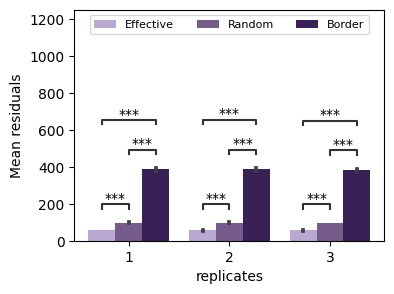

In [23]:
# 6 doses (part of the supplement)
fig_name = "-1-2-3-6doses-dil18-half-columns-neg-controls-0.2"
residuals_1rep = np.loadtxt('residuals-48-6-dil18-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-24-6-dil18-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-16-6-dil18-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250, leg_loc="upper center")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:1.105e-216 t=-3.145e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:9.894e-224 t=-3.197e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-7.867e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-7.869e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:4.803e-190 t=-2.943e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-7.868e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-9.591e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-9.566e+01
1_Effective vs. 1_Border: t-test independent sampl

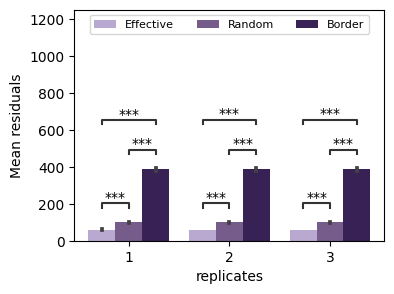

In [22]:
# 8 doses (part of the supplement)
fig_name = "-1-2-3-8doses-dil8-half-columns-neg-controls-0.2"
residuals_1rep = np.loadtxt('residuals-36-8-dil8-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-18-8-dil8-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-12-8-dil8-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250, leg_loc="upper center")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:4.669e-210 t=-3.096e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:5.093e-237 t=-3.291e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-8.150e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-8.237e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:9.724e-219 t=-3.160e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-8.142e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-9.791e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-9.632e+01
1_Effective vs. 1_Border: t-test independent sampl

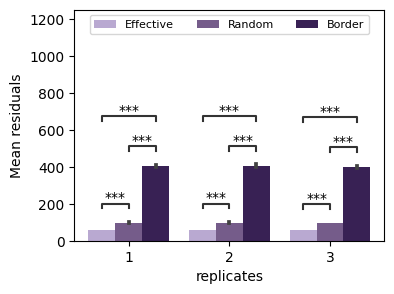

In [21]:
# 12 doses (part of the supplement)
fig_name = "-1-2-3-12doses-dil4-half-columns-neg-controls-0.2"
residuals_1rep = np.loadtxt('residuals-24-12-dil4-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-12-12-dil4-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-8-12-dil4-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250, leg_loc="upper center")

### Stronger plate effects

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:1.947e-260 t=-3.452e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:1.721e-241 t=-3.323e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.494e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-5.502e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:4.715e-248 t=-3.368e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.491e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-6.755e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-6.770e+01
1_Effective vs. 1_Border: t-test independent sampl

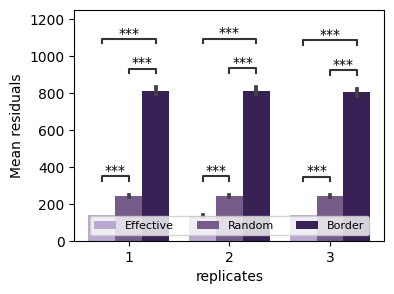

In [20]:
# 6 doses (part of the supplement)
fig_name = "-1-2-3-6doses-dil18-half-columns-neg-controls-0.4"
residuals_1rep = np.loadtxt('residuals-48-6-dil18-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-24-6-dil18-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-16-6-dil18-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:6.138e-241 t=-3.319e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:4.909e-242 t=-3.326e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.541e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-5.541e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:4.147e-216 t=-3.141e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.540e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-6.960e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-6.956e+01
1_Effective vs. 1_Border: t-test independent sampl

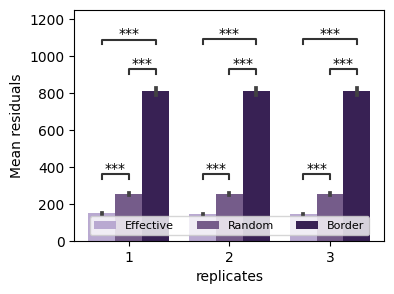

In [19]:
# 8 doses (part of the supplement)
fig_name = "-1-2-3-8doses-dil8-half-columns-neg-controls-0.4"
residuals_1rep = np.loadtxt('residuals-36-8-dil8-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-18-8-dil8-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-12-8-dil8-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Effective vs. 2_Random: t-test independent samples, P_val:3.899e-225 t=-3.207e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Effective vs. 3_Random: t-test independent samples, P_val:1.091e-251 t=-3.393e+01
2_Random vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-5.826e+01
3_Random vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-5.892e+01
1_Effective vs. 1_Random: t-test independent samples, P_val:3.579e-234 t=-3.271e+01
1_Random vs. 1_Border: t-test independent samples, P_val:0.000e+00 t=-5.826e+01
3_Effective vs. 3_Border: t-test independent samples, P_val:0.000e+00 t=-7.090e+01
2_Effective vs. 2_Border: t-test independent samples, P_val:0.000e+00 t=-6.965e+01
1_Effective vs. 1_Border: t-test independent sampl

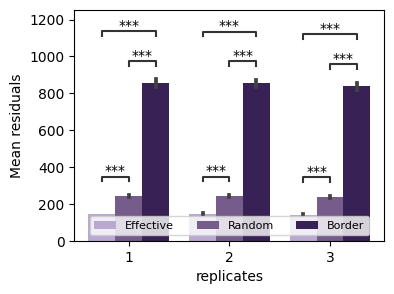

In [18]:
# 12 doses (part of the supplement)
fig_name = "-1-2-3-12doses-dil4-half-columns-neg-controls-0.4"
residuals_1rep = np.loadtxt('residuals-24-12-dil4-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-12-12-dil4-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-8-12-dil4-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250)

In [ ]:
residuals_1rep = np.loadtxt('residuals-48-6-dil8-1-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-24-6-dil8-2-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-16-6-dil8-3-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
residuals_1rep = np.loadtxt('residuals-48-6-dil8-1-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-24-6-dil8-2-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-16-6-dil8-3-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
residuals_1rep = np.loadtxt('residuals-36-8-dil4-1-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-18-8-dil4-2-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-12-8-dil4-3-0.055-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
residuals_1rep = np.loadtxt('residuals-36-8-dil4-1-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-18-8-dil4-2-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-12-8-dil4-3-0.085-20220228-r2_score-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 6 doses
residuals_1rep = np.loadtxt('residuals-48-6-dil18-1-0.02-20220304-diagonal-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-24-6-dil18-2-0.02-20220304-diagonal-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-16-6-dil18-3-0.02-20220304-diagonal-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 6 doses
residuals_1rep = np.loadtxt('residuals-48-6-dil18-1-0.055-20220304-diagonal-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-24-6-dil18-2-0.055-20220304-diagonal-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-16-6-dil18-3-0.055-20220304-diagonal-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 12 doses
residuals_1rep = np.loadtxt('residuals-24-12-dil4-1-1.25-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-12-12-dil4-2-1.25-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-8-12-dil4-3-1.25-20220313-diagonal-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses (currently on the appendix. Using 4 negative controls)
residuals_1rep = np.loadtxt('residuals-36-8-dil8-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-18-8-dil8-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-12-8-dil8-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 12 doses
residuals_1rep = np.loadtxt('residuals-24-12-dil4-1-8.0-20220313-linear_left-neg-control-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-12-12-dil4-2-8.0-20220313-linear_left-neg-control-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-8-12-dil4-3-8.0-20220313-linear_left-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
# 8 doses - half-right effect (on the paper!)
residuals_1rep = np.loadtxt('residuals-36-8-dil8-1-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt('residuals-18-8-dil8-2-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt('residuals-12-8-dil8-3-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')

In [ ]:
fig.savefig("residuals-8-dil8-half-right-neg-controls-0.4.png",bbox_inches='tight',dpi=1200)

In [ ]:
results_df = pd.DataFrame(residuals_1rep, columns=["layout", "error_type", "Error", "E", "rows lost", "residuals", "true_residuals"])

residuals_df = residuals_df[(residuals_df['rows lost']<=1)]

## Rename the layouts so they can be grouped as PLAID, RANDOM or Border
results_df.loc[(results_df['layout'] >= "plate_layout_rand"), 'layout'] = "Random"
results_df.loc[(results_df['layout'] >= "plate_layout_border") & (results_df['layout'] != "Random"), 'layout'] = "Border"
results_df.loc[(results_df['layout'] >= "plate_layout") & (results_df['layout'] != "Random"), 'layout'] = "Effective"


results_df.true_residuals = pd.to_numeric(results_df.true_residuals, errors='coerce')

print(results_df[results_df['layout']=='Effective'].describe())

print(results_df[results_df['layout']=='Random'].describe())

print(results_df[results_df['layout']=='Border'].describe())

rand_results_array = results_df.true_residuals[results_df.layout=="Random"]
plaid_results_array = results_df.true_residuals[results_df.layout=="Effective"]
border_results_array = results_df.true_residuals[results_df.layout=="Border"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array))

print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array))
print("PLAID vs RANDOM layouts:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))

print("RANDOM vs BORDER layouts:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))

print("PLAID vs BORDER layouts:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False))


# Utilities

Examples on how to add more plate layouts

In [ ]:
# Add new PLAID layouts

layout_array = [197, 168, 90, 289, 52, 26, 216, 2, 45, 66, 81, 93, 190, 147, 119, 158, 13, 169, 156, 186, 127, 114, 227, 112, 76, 24, 61, 101, 12, 36, 143, 205, 218, 289, 50, 195, 231, 183, 103, 175, 199, 60, 94, 43, 142, 157, 280, 27, 137, 191, 254, 286, 289, 239, 273, 98, 242, 51, 264, 71, 1, 203, 225, 22, 79, 289, 171, 153, 70, 46, 23, 56, 238, 265, 220, 77, 128, 259, 125, 278, 271, 232, 31, 289, 287, 17, 40, 250, 245, 189, 91, 275, 151, 42, 267, 159, 121, 105, 260, 80, 3, 289, 251, 134, 129, 89, 257, 8, 116, 206, 62, 289, 138, 166, 208, 179, 55, 172, 246, 202, 193, 213, 148, 88, 182, 28, 240, 67, 111, 41, 289, 233, 281, 15, 11, 288, 252, 73, 146, 117, 258, 99, 289, 180, 215, 223, 141, 270, 289, 217, 106, 165, 35, 123, 69, 107, 109, 96, 261, 131, 289, 85, 29, 221, 210, 198, 63, 253, 161, 145, 249, 115, 212, 84, 277, 21, 289, 37, 256, 10, 124, 144, 243, 228, 269, 214, 18, 65, 102, 44, 136, 237, 59, 164, 196, 87, 108, 132, 118, 100, 272, 72, 178, 173, 47, 263, 181, 289, 201, 152, 167, 222, 279, 289, 209, 74, 244, 160, 53, 6, 154, 33, 83, 5, 285, 289, 229, 204, 282, 120, 133, 226, 289, 39, 174, 110, 268, 95, 20, 64, 7, 30, 34, 224, 14, 149, 194, 247, 185, 54, 176, 113, 57, 235, 266, 9, 97, 276, 25, 192, 262, 289, 283, 241, 211, 86, 289, 104, 82, 236, 162, 230, 163, 150, 38, 68, 255, 78, 188, 207, 200, 16, 126, 139, 170, 135, 92, 130, 49, 122, 4, 184, 248, 289, 187, 234, 19, 32, 140, 58, 289, 48, 155, 284, 177, 274, 75, 219]

util.save_plaid_layout("20", layout_array, num_rows=16, num_columns=24, compounds=48, concentrations=6, replicates=1, size_empty_edge=1, neg_controls=20,directory="compounds_PLAID_layouts")

# Check if there are duplicated layouts
util.check_duplicated_layouts(layout_dir = "compounds_PLAID_layouts/")


## References

[1] 
Yann Abraham. _Dose Response Curve Fitting in Python_. Available at https://gist.github.com/yannabraham/5f210fed773785d8b638 
